Title 


In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import shap
import warnings


warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv('/Users/mallorygo/Desktop/DATA1030/data1030-fall2025/final reports/ufc-master.csv')
pd.set_option("display.max_columns", None, "display.max_rows", None)

print(df.head())



          RedFighter        BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0  Alexandre Pantoja        Kai Asakura   -250.0     215.0           40.0000   
1  Shavkat Rakhmonov  Ian Machado Garry   -210.0     295.0           47.6190   
2         Ciryl Gane   Alexander Volkov   -380.0     300.0           26.3158   
3     Bryce Mitchell        Kron Gracie   -950.0     625.0           10.5263   
4      Nate Landwehr         Dooho Choi   -130.0     110.0           76.9231   

   BlueExpectedValue        Date                Location Country Winner  \
0              215.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
1              295.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
2              300.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
3              625.0  2024-12-07  Las Vegas, Nevada, USA     USA    Red   
4              110.0  2024-12-07  Las Vegas, Nevada, USA     USA   Blue   

   TitleBout    WeightClass Gender  NumberOfRounds  BlueCurrentLoseS

In [240]:

import os 
output_folder = "/Users/mallorygo/Desktop/DATA1030/data1030-fall2025/data1030_final/figurefolder"
#fig_path = os.path.join(output_folder, f"{fig_name}.png")


In [241]:
pd.set_option("display.max_columns", None, "display.max_rows", None)

print(df.dtypes) 
# How many rows and columns do we have in df_merge?
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows

print(len(df))

RedFighter                      object
BlueFighter                     object
RedOdds                        float64
BlueOdds                       float64
RedExpectedValue               float64
BlueExpectedValue              float64
Date                            object
Location                        object
Country                         object
Winner                          object
TitleBout                         bool
WeightClass                     object
Gender                          object
NumberOfRounds                   int64
BlueCurrentLoseStreak            int64
BlueCurrentWinStreak             int64
BlueDraws                        int64
BlueAvgSigStrLanded            float64
BlueAvgSigStrPct               float64
BlueAvgSubAtt                  float64
BlueAvgTDLanded                float64
BlueAvgTDPct                   float64
BlueLongestWinStreak             int64
BlueLosses                       int64
BlueTotalRoundsFought            int64
BlueTotalTitleBouts      

In [242]:
comm_drop = [
'Date','Location', 'Country'
]
df.drop(comm_drop, axis=1, inplace = True)


print(df.dtypes) 
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows

print(len(df))

RedFighter                      object
BlueFighter                     object
RedOdds                        float64
BlueOdds                       float64
RedExpectedValue               float64
BlueExpectedValue              float64
Winner                          object
TitleBout                         bool
WeightClass                     object
Gender                          object
NumberOfRounds                   int64
BlueCurrentLoseStreak            int64
BlueCurrentWinStreak             int64
BlueDraws                        int64
BlueAvgSigStrLanded            float64
BlueAvgSigStrPct               float64
BlueAvgSubAtt                  float64
BlueAvgTDLanded                float64
BlueAvgTDPct                   float64
BlueLongestWinStreak             int64
BlueLosses                       int64
BlueTotalRoundsFought            int64
BlueTotalTitleBouts              int64
BlueWinsByDecisionMajority       int64
BlueWinsByDecisionSplit          int64
BlueWinsByDecisionUnanimo

In [243]:
#Separating the features based on their data types
cat_col = [col for col in df.columns if df[col].dtypes == 'object']
num_col = [col for col in df.columns if col not in cat_col]
print(df['Winner'].value_counts(dropna=False))


Winner
Red     3787
Blue    2741
Name: count, dtype: int64


In [244]:
#take care of missingness in Winner
print("Unique values in Winner column:", df['Winner'].unique())
# Strip spaces and lowercase all values
df['Winner'] = df['Winner'].astype(str).str.strip().str.capitalize()
print("Cleaned Winner values:", df['Winner'].unique())
df = df[df['Winner'].isin(['Red', 'Blue'])]
print("Rows remaining after filtering:", len(df))



Unique values in Winner column: ['Red' 'Blue']
Cleaned Winner values: ['Red' 'Blue']
Rows remaining after filtering: 6528


In [245]:
unique_categorieswc = df['WeightClass'].unique()
print(unique_categorieswc)

['Flyweight' 'Welterweight' 'Heavyweight' 'Featherweight'
 'Light Heavyweight' 'Catch Weight' 'Lightweight' 'Bantamweight'
 "Women's Strawweight" "Women's Flyweight" 'Middleweight'
 "Women's Bantamweight" "Women's Featherweight"]


In [246]:
from sklearn.preprocessing import LabelEncoder
print(df['Winner'].value_counts(dropna=False))
# Convert 'Red' and 'Blue' winner string to binary label (1 = Red wins, 0 = Blue wins)
df = df[df['Winner'].isin(['Red', 'Blue'])]  # filter out 'Draw' or 'No Contest'
print("Rows remaining after filtering:", len(df))

cat_col = ['RedFighter', 'BlueFighter', 'WeightClass', 'Gender']

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

for col in cat_col:
    if col in df.columns:
        df[col] = enc.fit_transform(df[col].astype(str))
    else:
        print(f"Warning: Column {col} not found in dataframe.")

print(df['Winner'].value_counts())
#Series([], Name: count, dtype: int64)

# result = 
# Series([], Name: count, dtype: int64)
# Rows remaining after filtering: 0
# Series([], Name: count, dtype: int64)

Winner
Red     3787
Blue    2741
Name: count, dtype: int64
Rows remaining after filtering: 6528
Winner
Red     3787
Blue    2741
Name: count, dtype: int64


In [247]:

win_counts = df['Winner'].value_counts()
# Display the frequency table
print("Frequency Table for 'Winner' column:")
print(win_counts)

Frequency Table for 'Winner' column:
Winner
Red     3787
Blue    2741
Name: count, dtype: int64


In [248]:
for column in df.columns:
    if df[column].isnull().sum()!=0:
        print(f"Nan in {column}: {df[column].isnull().sum()}")

Nan in RedOdds: 227
Nan in BlueOdds: 226
Nan in RedExpectedValue: 227
Nan in BlueExpectedValue: 226
Nan in BlueAvgSigStrLanded: 930
Nan in BlueAvgSigStrPct: 765
Nan in BlueAvgSubAtt: 832
Nan in BlueAvgTDLanded: 833
Nan in BlueAvgTDPct: 842
Nan in BlueStance: 3
Nan in RedAvgSigStrLanded: 455
Nan in RedAvgSigStrPct: 357
Nan in RedAvgSubAtt: 357
Nan in RedAvgTDLanded: 357
Nan in RedAvgTDPct: 367
Nan in EmptyArena: 1486
Nan in BMatchWCRank: 5328
Nan in RMatchWCRank: 4749
Nan in RWFlyweightRank: 6432
Nan in RWFeatherweightRank: 6519
Nan in RWStrawweightRank: 6382
Nan in RWBantamweightRank: 6374
Nan in RHeavyweightRank: 6342
Nan in RLightHeavyweightRank: 6344
Nan in RMiddleweightRank: 6346
Nan in RWelterweightRank: 6337
Nan in RLightweightRank: 6344
Nan in RFeatherweightRank: 6351
Nan in RBantamweightRank: 6347
Nan in RFlyweightRank: 6340
Nan in RPFPRank: 6275
Nan in BWFlyweightRank: 6455
Nan in BWFeatherweightRank: 6527
Nan in BWStrawweightRank: 6428
Nan in BWBantamweightRank: 6421
Nan in B

In [249]:

#force numeric WeightClass 
df['WeightClass'] = pd.to_numeric(df['WeightClass'], errors='coerce')

weightclass_labels = {
    0: 'Flyweight',
    1: 'Welterweight',
    2: 'Heavyweight',
    3: 'Featherweight',
    4: 'Light Heavyweight',
    5: 'Catch Weight',
    6: 'Lightweight',
    7: 'Bantamweight',
    8: "Women's Strawweight",
    9: "Women's Flyweight",
    10: "Middleweight",  
    11: "Women's Bantamweight",     
    12: "Women's Featherweight "               
}



df['WeightClassLabel'] = df['WeightClass'].map(weightclass_labels)

#check
missing_wtclass = df['WeightClass'].isnull().sum()
print(f"✅ WeightClass mapped. Missing values: {missing_wtclass}")


✅ WeightClass mapped. Missing values: 0


        RedFighter  BlueFighter      RedOdds     BlueOdds  RedExpectedValue  \
count  6528.000000  6528.000000  6301.000000  6302.000000       6301.000000   
mean    819.761795   942.707874  -115.711474    59.793240         96.658224   
std     476.188466   556.368724   277.225783   253.117416         85.891109   
min       0.000000     0.000000 -2100.000000 -1200.000000          4.761900   
25%     419.000000   462.000000  -255.000000  -150.000000         39.215700   
50%     806.000000   922.500000  -150.000000   130.000000         66.666700   
75%    1241.250000  1427.000000   130.000000   215.000000        130.000000   
max    1660.000000  1921.000000   775.000000  1300.000000        775.000000   

       BlueExpectedValue  WeightClass       Gender  NumberOfRounds  \
count        6302.000000  6528.000000  6528.000000     6528.000000   
mean          165.054566     5.503370     0.877298        3.185509   
std           137.689177     3.200274     0.328120        0.577441   
min     

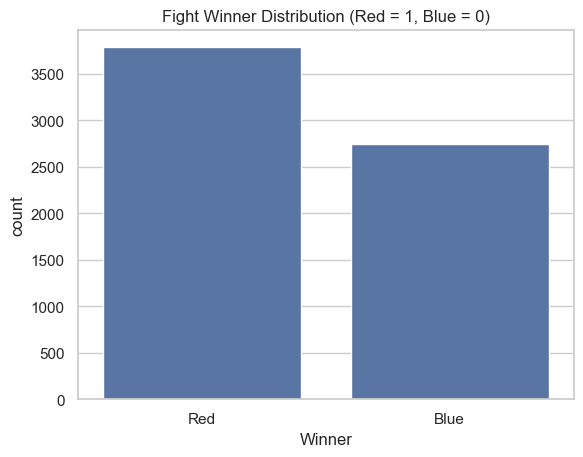

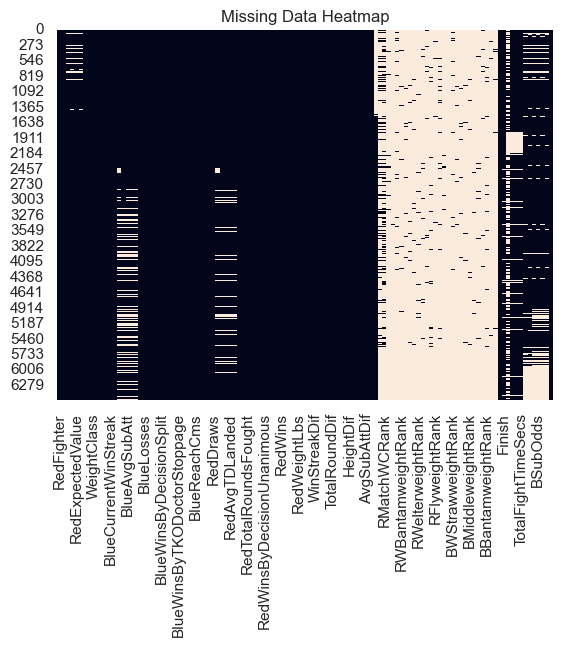

In [250]:

# Basic descriptive statistics
print(df.describe())

# Check class balance
sns.countplot(x='Winner', data=df)
plt.title('Fight Winner Distribution (Red = 1, Blue = 0)')
fig_name = "fight_winner_dist"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Missing data heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
fig_name = "missing_data_heatmap1"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


In [251]:
import numpy as np
df["BlueHeight"] = df["BlueHeightCms"] / 2.54
df['BlueReach']= df['BlueReachCms'] / 2.54
df['RedHeight'] = df['RedHeightCms'] / 2.54
df['RedReach']= df['RedReachCms'] / 2.54
df.drop(columns = ['BlueHeightCms', 'BlueReachCms', 'RedHeightCms', 'RedReachCms'], axis = 1, inplace = True)

df['ROver35'] = df['RedAge'].apply(lambda x: int(x > 35))
df['BOver35'] = df['BlueAge'].apply(lambda x: int(x > 35))

df['RWinPct'] = df['RedWins'] / (df['RedWins'] + df['RedLosses'])
df['BWinPct'] = df['BlueWins'] / (df['BlueWins'] + df['BlueLosses'])

df['RedStrikingRatio'] = df['RedAvgSigStrLanded'] / (df['RedAvgSigStrLanded'] + df['BlueAvgSigStrLanded'])
df['BlueStrikingRatio'] = df['BlueAvgSigStrLanded'] / (df['RedAvgSigStrLanded'] + df['BlueAvgSigStrLanded'])

df['RedTotalFights'] = df['RedWins'] + df['RedLosses']
df['BlueTotalFights'] = df['BlueWins'] + df['BlueLosses']

df['RedIsGrappler'] = (df['RedAvgTDLanded'] > 3.5).astype(int)
df['BlueIsGrappler'] = (df['BlueAvgTDLanded'] > 3.5).astype(int)

df['RedIsStriker'] = (df['RedAvgSigStrLanded'] > 6.0).astype(int)
df['BlueIsStriker'] = (df['BlueAvgSigStrLanded'] > 6.0).astype(int)

df['RGrapplerVBStriker'] = ((df['RedIsGrappler'] == 1) & (df['BlueIsStriker'] == 1)).astype(int)
df['BGrapplerVRStriker'] = ((df['BlueIsGrappler'] == 1) & (df['RedIsStriker'] == 1)).astype(int)

df['RedStrikingEfficiency'] = df['RedAvgSigStrLanded'] * df['RedAvgSigStrPct']
df['BlueStrikingEfficiency'] = df['BlueAvgSigStrLanded'] * df['BlueAvgSigStrPct']

df['RedTDEfficiency'] = df['RedAvgTDLanded'] * df['RedAvgTDPct']
df['BlueTDEfficiency'] = df['BlueAvgTDLanded'] * df['BlueAvgTDPct']

df['RedEffectiveTD'] = 1 / (df['RedAvgTDLanded'] / df['RedAvgSubAtt'])
df['BlueEffectiveTD'] = 1 / (df['BlueAvgTDLanded'] / df['BlueAvgSubAtt'])
df['EffectiveTDDif'] = df['BlueEffectiveTD'] - df['RedEffectiveTD']

df['RedSize'] = df['RedHeight'] + df['RedReach']
df['BlueSize'] = df['BlueHeight'] + df['BlueReach']

df['Favorite'] = (df['RedOdds'] < df['BlueOdds']).astype(int)

df['Favorite'] = df['Favorite'].map({0 : 'Blue', 1 : 'Red'})

df['FavoriteWins'] = (df['Favorite'] == df['Winner']).astype(int)

In [252]:
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,WeightClassLabel,BlueHeight,BlueReach,RedHeight,RedReach,ROver35,BOver35,RWinPct,BWinPct,RedStrikingRatio,BlueStrikingRatio,RedTotalFights,BlueTotalFights,RedIsGrappler,BlueIsGrappler,RedIsStriker,BlueIsStriker,RGrapplerVBStriker,BGrapplerVRStriker,RedStrikingEfficiency,BlueStrikingEfficiency,RedTDEfficiency,BlueTDEfficiency,RedEffectiveTD,BlueEffectiveTD,EffectiveTDDif,RedSize,BlueSize,Favorite,FavoriteWins
0,66,1009,-250.0,215.0,40.0000,215.0,Red,True,3,1,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0,Featherweight,68.0,69.0,65.0,67.0,0,0,0.800000,NaN,1.000000,0.000000,15,0,0,0,0,0,0,0,2.1609,0.0000,1.2267,0.0000,0.306513,NaN,NaN,132.0,137.0,Red,1
1,1441,718,-210.0,295.0,47.6190,295.0,Red,False,8,1,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0,Women's Strawweight,75.0,74.0,73.0,77.0,0,0,1.000000,1.000000,0.428274,0.571726,6,8,0,0,0,0,0,0,2.5132,3.0250,0.4321,0.4235,1.208054,0.389610,-0.818443,150.0,149.0,Red,1
2,307,67,-380.0,300.0,26.3158,300.0,Red,False,4,1,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0,Light Heavyweight,79.0,80.0,76.0,81.0,0,1,0.818182,0.750000,0.516949,0.483051,11,16,0,0,0,0,0,0,3.2940,2.9241,0.1218,0.2835,0.862069,0.444444,-0.417625,157.0,159.0,Red,1
3,221,1071,-950.0,625.0,10.5263,625.0,Red,False,2,1,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,145,1,0,0,2.30,

In [253]:
df['draw_diff'] = (df['BlueDraws']-df['RedDraws'])
df['avg_sig_str_pct_diff'] = (df['BlueAvgSigStrPct']-df['RedAvgSigStrPct'])
df['avg_TD_pct_diff'] = (df['BlueAvgTDPct']-df['RedAvgTDPct'])
df['win_by_Decision_Majority_diff'] = (df['BlueWinsByDecisionMajority']-df['RedWinsByDecisionMajority'])
df['win_by_Decision_Split_diff'] = (df['BlueWinsByDecisionSplit']-df['RedWinsByDecisionSplit'])
df['win_by_Decision_Unanimous_diff'] = (df['BlueWinsByDecisionUnanimous']-df['RedWinsByDecisionUnanimous'])
df['win_by_TKO_Doctor_Stoppage_diff'] = (df['BlueWinsByTKODoctorStoppage']-df['RedWinsByTKODoctorStoppage'])
df['odds_diff'] = (df['BlueOdds']-df['RedOdds'])
df['ev_diff'] = (df['BlueExpectedValue']-df['RedExpectedValue'])


blue_win = df[df['Winner'] == 'Blue']
red_win = df[df['Winner'] == 'Red']

blue_win_percent = len(blue_win) / len(df)
red_win_percent = len(red_win) / len(df)
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,WeightClassLabel,BlueHeight,BlueReach,RedHeight,RedReach,ROver35,BOver35,RWinPct,BWinPct,RedStrikingRatio,BlueStrikingRatio,RedTotalFights,BlueTotalFights,RedIsGrappler,BlueIsGrappler,RedIsStriker,BlueIsStriker,RGrapplerVBStriker,BGrapplerVRStriker,RedStrikingEfficiency,BlueStrikingEfficiency,RedTDEfficiency,BlueTDEfficiency,RedEffectiveTD,BlueEffectiveTD,EffectiveTDDif,RedSize,BlueSize,Favorite,FavoriteWins,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff
0,66,1009,-250.0,215.0,40.0000,215.0,Red,True,3,1,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0,Featherweight,68.0,69.0,65.0,67.0,0,0,0.800000,NaN,1.000000,0.000000,15,0,0,0,0,0,0,0,2.1609,0.0000,1.2267,0.0000,0.306513,NaN,NaN,132.0,137.0,Red,1,0,-0.49,-0.47,0,-2,-4,0,465.0,175.0000
1,1441,718,-210.0,295.0,47.6190,295.0,Red,False,8,1,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0,Women's Strawweight,75.0,74.0,73.0,77.0,0,0,1.000000,1.000000,0.428274,0.571726,6,8,0,0,0,0,0,0,2.5132,3.0250,0.4321,0.4235,1.208054,0.389610,-0.818443,150.0,149.0,Red,1,0,-0.06,0.26,0,1,4,0,505.0,247.3810
2,307,67,-380.0,300.0,26.3158,300.0,Red,False,4,1,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0,Light Heavyweight,79.0,80.0,76.0,81.0,0,

In [254]:
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows

6528
150


In [255]:
df.BlueStance.unique()
#It has one spelling mistake
df['BlueStance'].loc[df['BlueStance']=='Switch '] = 'Switch'
#R_Stance doesn't have this error, so we're cool

print(df['BlueStance'].value_counts())

BlueStance
Orthodox       4844
Southpaw       1274
Switch          406
Open Stance       1
Name: count, dtype: int64


Red Win Percentage Increase (w/ +1 more TDs): 0.06798639360885117
Blue Win Percentage Increase (w/ +1 more TDs): 0.0755971117904845


Red Win Percentage Increase (w/ Red TD > 2.5, Blue TD < 1): 0.11768577623357035
Blue Win Percentage Increase (w/ Blue TD > 2.5, Red TD < 1): 0.13643041474268885


Decrease in Win Percentage When Red Fighter > 35 y.o.: -0.1215602718360071
Decrease in Win Percentage When Blue Fighter > 35 y.o.: -0.08955866868408013
0.6499693627450981
Blue Corner Win Percentage: 0.41988357843137253
Red Corner Win Percentage: 0.5801164215686274


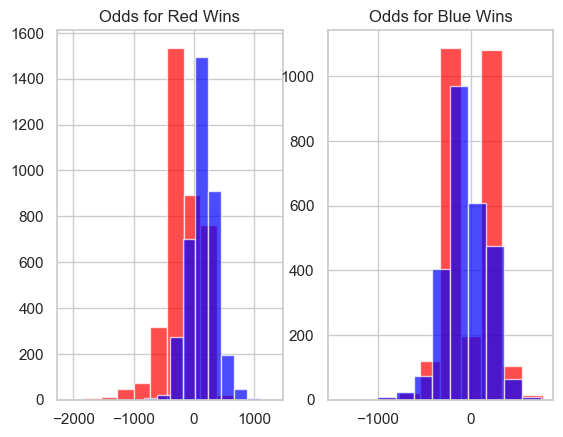

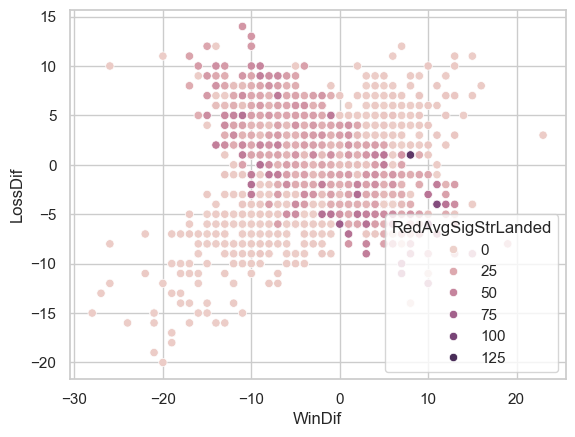

In [256]:

red_win_percent_high_TDDif = len(red_win[red_win['AvgTDDif'] < -1]) / len(df[df['AvgTDDif'] < -1])
print("Red Win Percentage Increase (w/ +1 more TDs): " + str(red_win_percent_high_TDDif - red_win_percent))

blue_win_percent_high_TDDif = len(blue_win[blue_win['AvgTDDif'] > 1]) / len(df[df['AvgTDDif'] > 1])
print("Blue Win Percentage Increase (w/ +1 more TDs): " + str(blue_win_percent_high_TDDif - blue_win_percent))

print('\n')

red_win_percent_highTD_v_lowTD = len(red_win[(red_win['RedAvgTDLanded'] > 2.5) & (red_win['BlueAvgTDLanded'] < 1)]) / len(df[(df['RedAvgTDLanded'] > 2.5) & (df['BlueAvgTDLanded'] < 1)])
print("Red Win Percentage Increase (w/ Red TD > 2.5, Blue TD < 1): " + str(red_win_percent_highTD_v_lowTD - red_win_percent))

blue_win_percent_highTD_v_lowTD = len(blue_win[(blue_win['BlueAvgTDLanded'] > 2.5) & (blue_win['RedAvgTDLanded'] < 1)]) / len(df[(df['BlueAvgTDLanded'] > 2.5) & (df['RedAvgTDLanded'] < 1)])
print("Blue Win Percentage Increase (w/ Blue TD > 2.5, Red TD < 1): " + str(blue_win_percent_highTD_v_lowTD - blue_win_percent))

print('\n')

red_old_win_percent = len(df[(df['ROver35'] == 1) & (df['Winner'] == 'Red')]) / len(df[df['ROver35'] == 1])
print("Decrease in Win Percentage When Red Fighter > 35 y.o.: " + str(red_old_win_percent - red_win_percent))
blue_old_win_percent = len(df[(df['BOver35'] == 1) & (df['Winner'] == 'Blue')]) / len(df[df['BOver35'] == 1])
print("Decrease in Win Percentage When Blue Fighter > 35 y.o.: " + str(blue_old_win_percent - blue_win_percent))


df.to_csv('df.csv')

print(df['FavoriteWins'].sum() / len(df))
print("Blue Corner Win Percentage: " + str(blue_win_percent))
print("Red Corner Win Percentage: " + str(red_win_percent))


fig, ax = plt.subplots(1, 2)
ax[0].hist(red_win['RedOdds'], alpha=0.7, color='red')
ax[0].hist(red_win['BlueOdds'], alpha=0.7, color='blue')
ax[0].set_title('Odds for Red Wins')
ax[1].hist(blue_win['RedOdds'], alpha=0.7, color='red')
ax[1].hist(blue_win['BlueOdds'], alpha=0.7, color='blue')
ax[1].set_title('Odds for Blue Wins')
fig_name = "odds"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

sns.scatterplot(x='WinDif', y='LossDif', data=df, hue='RedAvgSigStrLanded')
fig_name = "strikes_and_wins"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


In [257]:
#calc missing proportions
missing_proportions = df.isnull().sum() / len(df)
print("Proportion of missing values per column:")
print(missing_proportions)

#calc missing percentages
missing_percentages = df.isnull().sum() * 100 / len(df)
print("\nPercentage of missing values per column:")
print(missing_percentages)

Proportion of missing values per column:
RedFighter                         0.000000
BlueFighter                        0.000000
RedOdds                            0.034773
BlueOdds                           0.034620
RedExpectedValue                   0.034773
BlueExpectedValue                  0.034620
Winner                             0.000000
TitleBout                          0.000000
WeightClass                        0.000000
Gender                             0.000000
NumberOfRounds                     0.000000
BlueCurrentLoseStreak              0.000000
BlueCurrentWinStreak               0.000000
BlueDraws                          0.000000
BlueAvgSigStrLanded                0.142463
BlueAvgSigStrPct                   0.117188
BlueAvgSubAtt                      0.127451
BlueAvgTDLanded                    0.127604
BlueAvgTDPct                       0.128983
BlueLongestWinStreak               0.000000
BlueLosses                         0.000000
BlueTotalRoundsFought              

In [258]:
#count columns with any missing data
columns_with_missing_data = df.isna().any()
number_of_columns_with_missing_data = columns_with_missing_data.sum()
number_of_columns_with_missing_data

np.int64(70)

In [259]:
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows
#% of missing values per column 
missing_percentage = df.isnull().sum() * 100 / len(df)
print(missing_percentage)

6528
150
RedFighter                          0.000000
BlueFighter                         0.000000
RedOdds                             3.477328
BlueOdds                            3.462010
RedExpectedValue                    3.477328
BlueExpectedValue                   3.462010
Winner                              0.000000
TitleBout                           0.000000
WeightClass                         0.000000
Gender                              0.000000
NumberOfRounds                      0.000000
BlueCurrentLoseStreak               0.000000
BlueCurrentWinStreak                0.000000
BlueDraws                           0.000000
BlueAvgSigStrLanded                14.246324
BlueAvgSigStrPct                   11.718750
BlueAvgSubAtt                      12.745098
BlueAvgTDLanded                    12.760417
BlueAvgTDPct                       12.898284
BlueLongestWinStreak                0.000000
BlueLosses                          0.000000
BlueTotalRoundsFought               0.000000
B

In [260]:
# y = df['Winner']
# X = df.drop(columns=['Winner'])

# # Encode target variable labels as integers
# le = LabelEncoder()
# y = le.fit_transform(y)

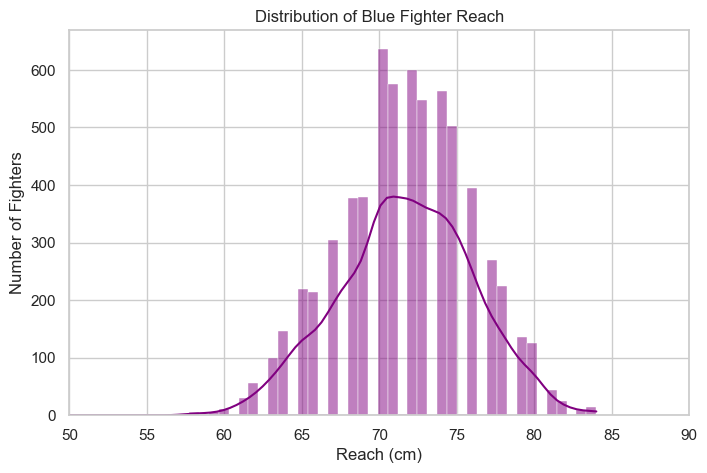

In [261]:
plt.figure(figsize=(8, 5))
sns.histplot(df['BlueReach'], kde=True, color='purple')
plt.title('Distribution of Blue Fighter Reach')
plt.xlabel('Reach (cm)')
plt.ylabel('Number of Fighters')
plt.xlim(50, 90)  # limit x-axis range to be reasonable bc who has a 20in reach? 
fig_name = "dist_blue_reach"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


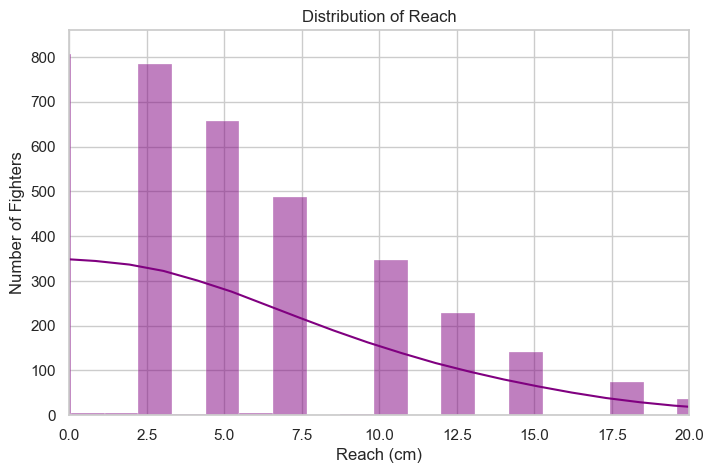

In [262]:
plt.figure(figsize=(8, 5))
sns.histplot(df['ReachDif'], kde=True, color='purple')
plt.title('Distribution of Reach')
plt.xlabel('Reach (cm)')
plt.ylabel('Number of Fighters')
plt.xlim(0, 20)  # limit x-axis range to be reasonable bc who has a 20in reach? 
fig_name = "dist_reach"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

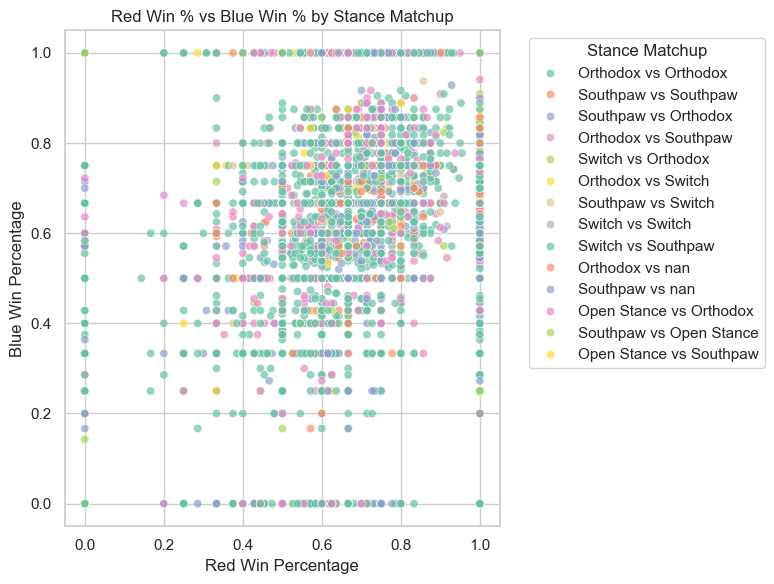

In [263]:
df['StanceCombo'] = df['RedStance'].astype(str) + ' vs ' + df['BlueStance'].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RWinPct', y='BWinPct', hue='StanceCombo', palette='Set2', alpha=0.7)
plt.title('Red Win % vs Blue Win % by Stance Matchup')
plt.xlabel('Red Win Percentage')
plt.ylabel('Blue Win Percentage')
plt.legend(title='Stance Matchup', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig_name = "stance_combo"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


In [264]:
print(df.dtypes) 


RedFighter                           int64
BlueFighter                          int64
RedOdds                            float64
BlueOdds                           float64
RedExpectedValue                   float64
BlueExpectedValue                  float64
Winner                              object
TitleBout                             bool
WeightClass                          int64
Gender                               int64
NumberOfRounds                       int64
BlueCurrentLoseStreak                int64
BlueCurrentWinStreak                 int64
BlueDraws                            int64
BlueAvgSigStrLanded                float64
BlueAvgSigStrPct                   float64
BlueAvgSubAtt                      float64
BlueAvgTDLanded                    float64
BlueAvgTDPct                       float64
BlueLongestWinStreak                 int64
BlueLosses                           int64
BlueTotalRoundsFought                int64
BlueTotalTitleBouts                  int64
BlueWinsByD

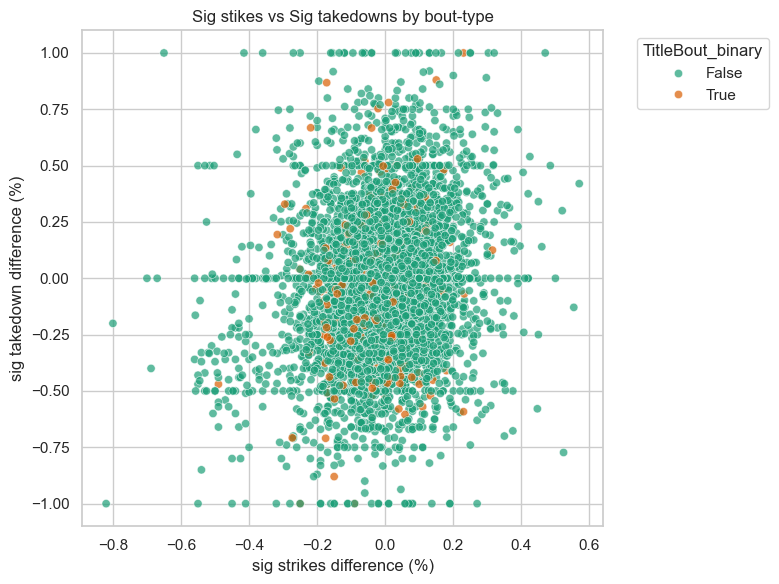

In [265]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='avg_sig_str_pct_diff',
    y='avg_TD_pct_diff',    
    hue='TitleBout',
    palette='Dark2',
    alpha=0.7
)
plt.title('Sig stikes vs Sig takedowns by bout-type')
plt.xlabel('sig strikes difference (%)')
plt.ylabel('sig takedown difference (%)')
plt.legend(title='TitleBout_binary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
fig_name = "sigstrikes_sigtakedowns"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [266]:
# a list of all fighter names from the red and blue corner
all_fighters_df = pd.concat([df.RedFighter, df.BlueFighter], ignore_index = True) 

# how many unique names there are
all_fighters_nbr = all_fighters_df.nunique() 
print(all_fighters_nbr)

# a list of all fighter names from the red and blue corner
all_fighters_df = pd.concat([df.RedFighter, df.BlueFighter], ignore_index = True) 

#check how many unique names there are
all_fighters_nbr = all_fighters_df.nunique() 
print(all_fighters_nbr)

df['WeightClass'].value_counts()

1922
1922


WeightClass
6     1074
8     1026
7      783
2      754
0      679
5      501
4      496
3      353
12     320
11     239
9      213
1       61
10      29
Name: count, dtype: int64

In [267]:
#remove possible leading and trailing spaces in all 'object' columns
ufc_obj = df.select_dtypes(['object'])
df[ufc_obj.columns] = ufc_obj.apply(lambda x: x.str.strip()) # Apply over every column function lambda
#categorical 
print(df['Finish'].value_counts())
#filtering
kos_by_round = df[['Finish', 'FinishRound']].query('Finish == "KO/TKO"') # Create new filtered dataframe
# kos_by_round

Finish
U-DEC         2404
KO/TKO        2009
SUB           1157
S-DEC          654
M-DEC           46
DQ              18
Overturned       2
Name: count, dtype: int64


Winner
Red     2659
Blue    1159
Name: count, dtype: int64

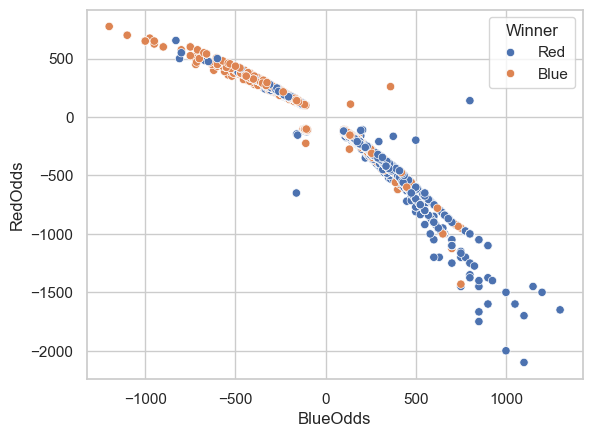

In [268]:
#Analysing "_odds" variables
sns.scatterplot(x="BlueOdds", y="RedOdds", hue="Winner", data = df)
df["Winner"].loc[df["BlueOdds"]>1].value_counts()


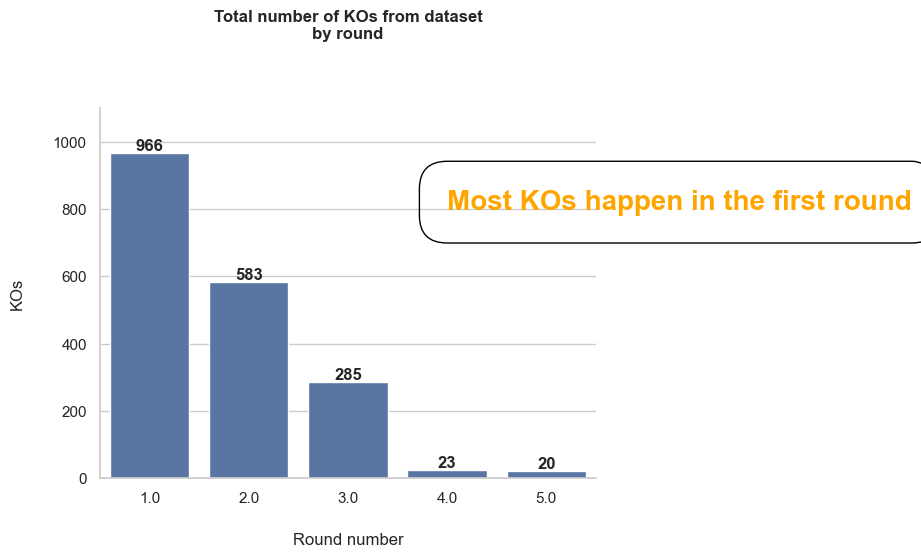

In [269]:
KOs = sns.countplot(x = kos_by_round['FinishRound']);
plt.title('Total number of KOs from dataset\nby round', pad = 50, weight = 'bold') # \n for line break. S: https://www.python-graph-gallery.com/190-custom-matplotlib-title
plt.xlabel('Round number', labelpad = 20) # Label weight set to bold in general settings
plt.ylabel('KOs', labelpad = 20)
sns.despine() # Remove top and right border
plt.ylim([0,1100])
plt.bar_label(KOs.containers[0], weight = 'bold') # Add number labels on top of bars
plt.text(x = 3, y = 800, s = 'Most KOs happen in the first round', fontdict = {'size' : 20, 'weight' : 'bold', 'color': 'orange'}, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'));

In [270]:
# Calculate the age gap
df['AgeGap'] = abs(df['RedAge'] - df['BlueAge'])
# df[['AgeGap', 'RedAge', 'BlueAge']]

In [271]:
# Create a function to calculate the spread as positive number
def spread_calculation(RedOdds, BlueOdds):
    if RedOdds > 0 and BlueOdds > 0: 
        return max(RedOdds, BlueOdds) - min(RedOdds, BlueOdds)
    else: 
        return abs(RedOdds - BlueOdds)

# Create column that holds the spread
df['Spread'] = df.apply(lambda row: spread_calculation(row['RedOdds'], row['BlueOdds']), axis=1)

# Check results
# df[['RedOdds', 'BlueOdds','Spread']]

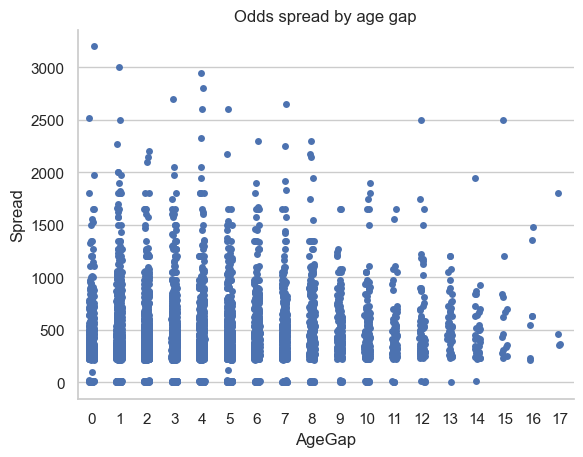

In [272]:
sns.stripplot(data = df, x = 'AgeGap', y = 'Spread').set(title = 'Odds spread by age gap')
sns.despine()

In [273]:
# Create a frequency table 
win_counts = df['Winner'].value_counts()
# Display the frequency table
print("Frequency Table for 'Winner' column:")
print(win_counts)

Frequency Table for 'Winner' column:
Winner
Red     3787
Blue    2741
Name: count, dtype: int64


In [274]:
# To get proportions instead of counts
check_win = df['Winner'].value_counts(normalize=True)
print("\nProportion Table for 'Winner' column:")
print(check_win)


Proportion Table for 'Winner' column:
Winner
Red     0.580116
Blue    0.419884
Name: proportion, dtype: float64


In [275]:
print(df.dtypes) 
# How many rows and columns do we have in df_merge?
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows

print(len(df))
df.head()

RedFighter                           int64
BlueFighter                          int64
RedOdds                            float64
BlueOdds                           float64
RedExpectedValue                   float64
BlueExpectedValue                  float64
Winner                              object
TitleBout                             bool
WeightClass                          int64
Gender                               int64
NumberOfRounds                       int64
BlueCurrentLoseStreak                int64
BlueCurrentWinStreak                 int64
BlueDraws                            int64
BlueAvgSigStrLanded                float64
BlueAvgSigStrPct                   float64
BlueAvgSubAtt                      float64
BlueAvgTDLanded                    float64
BlueAvgTDPct                       float64
BlueLongestWinStreak                 int64
BlueLosses                           int64
BlueTotalRoundsFought                int64
BlueTotalTitleBouts                  int64
BlueWinsByD

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,WeightClassLabel,BlueHeight,BlueReach,RedHeight,RedReach,ROver35,BOver35,RWinPct,BWinPct,RedStrikingRatio,BlueStrikingRatio,RedTotalFights,BlueTotalFights,RedIsGrappler,BlueIsGrappler,RedIsStriker,BlueIsStriker,RGrapplerVBStriker,BGrapplerVRStriker,RedStrikingEfficiency,BlueStrikingEfficiency,RedTDEfficiency,BlueTDEfficiency,RedEffectiveTD,BlueEffectiveTD,EffectiveTDDif,RedSize,BlueSize,Favorite,FavoriteWins,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,StanceCombo,AgeGap,Spread
0,66,1009,-250.0,215.0,40.0000,215.0,Red,True,3,1,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0,Featherweight,68.0,69.0,65.0,67.0,0,0,0.800000,NaN,1.000000,0.000000,15,0,0,0,0,0,0,0,2.1609,0.0000,1.2267,0.0000,0.306513,NaN,NaN,132.0,137.0,Red,1,0,-0.49,-0.47,0,-2,-4,0,465.0,175.0000,Orthodox vs Orthodox,3,465.0
1,1441,718,-210.0,295.0,47.6190,295.0,Red,False,8,1,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0,Women's Strawweight,75.0,74.0,73.0,77.0,0,0,1.000000,1.000000,0.428274,0.571726,6,8,0,0,0,0,0,0,2.5132,3.0250,0.4321,0.4235,1.208054,0.389610,-0.818443,150.0,149.0,Red,1,0,-0.06,0.26,0,1,4,0,505.0,247.3810,Orthodox vs Orthodox,3,505.0
2,307,67,-380.0,300.0,26.3158,300.0,Red,False,4,1,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,90

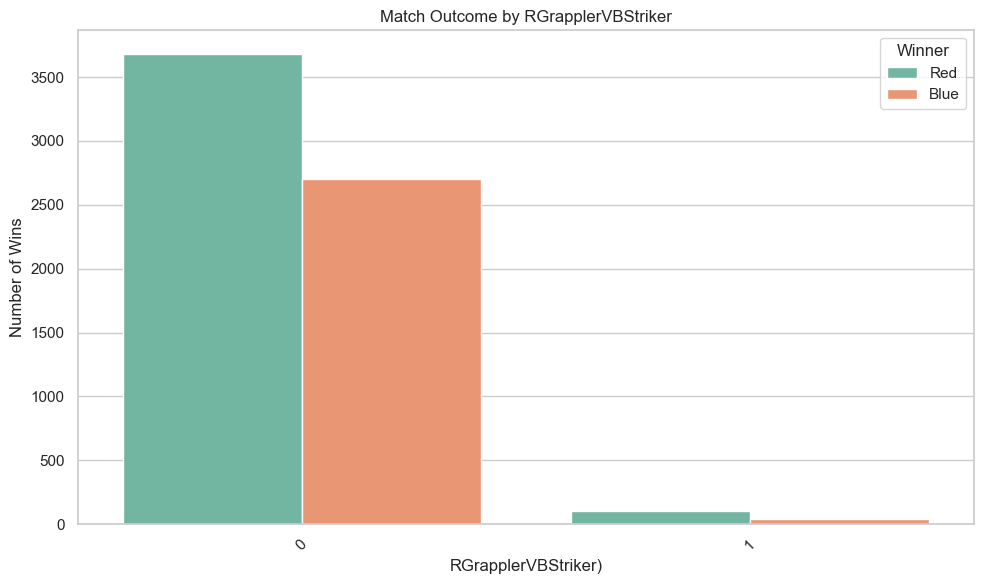

In [276]:
# Plot: Count of Winners per Matchup type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RGrapplerVBStriker', hue='Winner', palette='Set2')
plt.title('Match Outcome by RGrapplerVBStriker')
plt.xlabel('RGrapplerVBStriker)')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
fig_name = "grappler_v_striker"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

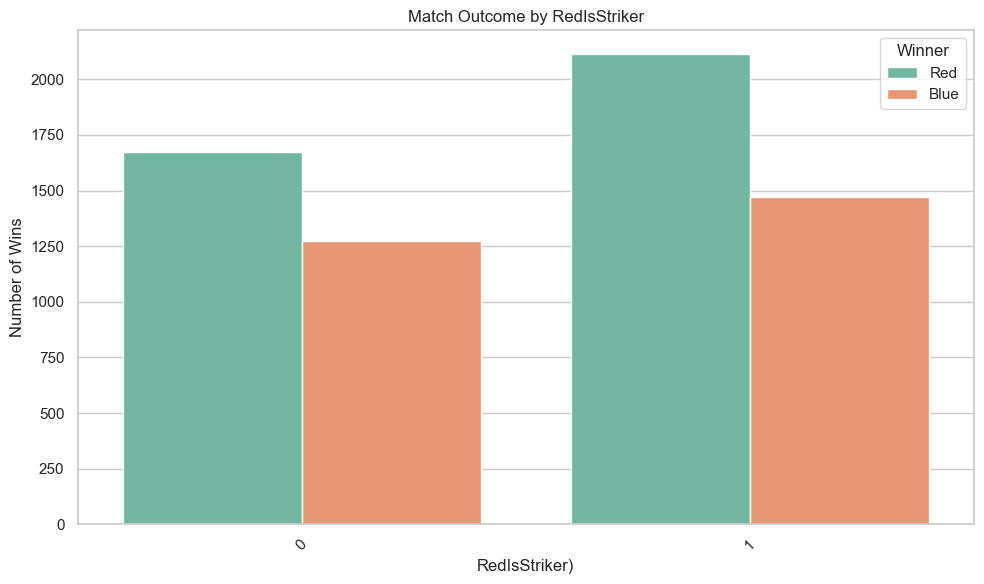

In [277]:
# Create a new combined column for Red vs Blue matchup
#df['Matchup'] = df['RGrapplerVBStriker'].astype(str)

# Plot: Count of Winners per Matchup type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RedIsStriker', hue='Winner', palette='Set2')
plt.title('Match Outcome by RedIsStriker')
plt.xlabel('RedIsStriker)')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
fig_name = "redstriker"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

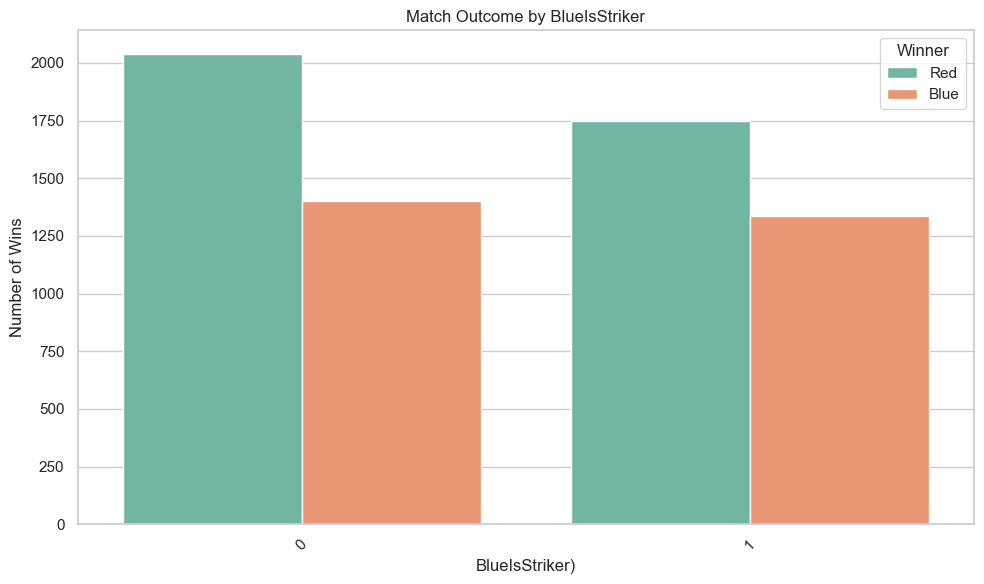

In [278]:
# Plot: Count of Winners per Matchup type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BlueIsStriker', hue='Winner', palette='Set2')
plt.title('Match Outcome by BlueIsStriker')
plt.xlabel('BlueIsStriker)')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
fig_name = "bluestriker"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import numpy as np



# Convert TitleBout to string "True"/"False" for encoding
if 'TitleBout' in df.columns:
    df['TitleBout'] = df['TitleBout'].astype(str)


categorical_nominal = [
    'Country', 'BlueStance', 'RedStance', 'BetterRank',
    'Finish', 'FinishDetails', 'FinishRoundTime',
    'Favorite', 'StanceCombo', 'TitleBout', "WeightClass"
]


numeric_features = [
    'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue',
    'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws',
    'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct',
    'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts',
    'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
    'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage', 'BlueWins',
    'BlueWeightLbs', 'BlueAge',

    'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws',
    'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt', 'RedAvgTDLanded', 'RedAvgTDPct',
    'RedLongestWinStreak', 'RedLosses', 'RedTotalRoundsFought', 'RedTotalTitleBouts',
    'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
    'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage', 'RedWins',
    'RedWeightLbs', 'RedAge',

    'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif',
    'KODif', 'SubDif', 'HeightDif', 'ReachDif', 'AgeDif', 'SigStrDif', 'AvgSubAttDif', 'AvgTDDif',
    'EmptyArena',

    'BMatchWCRank', 'RMatchWCRank',
    'RWFlyweightRank', 'RWFeatherweightRank', 'RWStrawweightRank', 'RWBantamweightRank', 'RHeavyweightRank',
    'RLightHeavyweightRank', 'RMiddleweightRank', 'RWelterweightRank', 'RLightweightRank', 'RFeatherweightRank',
    'RBantamweightRank', 'RFlyweightRank', 'RPFPRank',
    'BWFlyweightRank', 'BWFeatherweightRank', 'BWStrawweightRank', 'BWBantamweightRank', 'BHeavyweightRank',
    'BLightHeavyweightRank', 'BMiddleweightRank', 'BWelterweightRank', 'BLightweightRank', 'BFeatherweightRank',
    'BBantamweightRank', 'BFlyweightRank', 'BPFPRank',

    'FinishRound', 'TotalFightTimeSecs',
    'RedDecOdds', 'BlueDecOdds', 'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds',

    'BlueHeight', 'BlueReach', 'RedHeight', 'RedReach',

    'ROver35', 'BOver35',

    'RWinPct', 'BWinPct',
    'RedStrikingRatio', 'BlueStrikingRatio',
    'RedTotalFights', 'BlueTotalFights',
    'RedIsGrappler', 'BlueIsGrappler', 'RedIsStriker', 'BlueIsStriker',
    'RGrapplerVBStriker', 'BGrapplerVRStriker',
    'RedStrikingEfficiency', 'BlueStrikingEfficiency',
    'RedTDEfficiency', 'BlueTDEfficiency',
    'RedEffectiveTD', 'BlueEffectiveTD',
    'EffectiveTDDif',
    'RedSize', 'BlueSize',
    'FavoriteWins', 'draw_diff',
    'avg_sig_str_pct_diff', 'avg_TD_pct_diff',
    'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
    'win_by_TKO_Doctor_Stoppage_diff', 'odds_diff', 'ev_diff'
]

# Replace infinite values with NaN in numeric features ---
df[numeric_features] = df[numeric_features].replace([np.inf, -np.inf], np.nan)


# numeric_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_nominal_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# categorical_ordered_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     # ('ordinal', OrdinalEncoder(categories=ordinal_cats))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_nominal_transformer, categorical_nominal)
#     ])


# prep = Pipeline(steps=[('preprocessor', preprocessor)]) 




In [280]:
print(df.dtypes) 
print(df.shape[0]) # number of rows
print(df.shape[1]) # number of rows
print(len(df))
df.head()
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print(f"Number of unique values in column '{column}': {len(unique_values)}\n")

RedFighter                           int64
BlueFighter                          int64
RedOdds                            float64
BlueOdds                           float64
RedExpectedValue                   float64
BlueExpectedValue                  float64
Winner                              object
TitleBout                           object
WeightClass                          int64
Gender                               int64
NumberOfRounds                       int64
BlueCurrentLoseStreak                int64
BlueCurrentWinStreak                 int64
BlueDraws                            int64
BlueAvgSigStrLanded                float64
BlueAvgSigStrPct                   float64
BlueAvgSubAtt                      float64
BlueAvgTDLanded                    float64
BlueAvgTDPct                       float64
BlueLongestWinStreak                 int64
BlueLosses                           int64
BlueTotalRoundsFought                int64
BlueTotalTitleBouts                  int64
BlueWinsByD

In [281]:
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,WeightClassLabel,BlueHeight,BlueReach,RedHeight,RedReach,ROver35,BOver35,RWinPct,BWinPct,RedStrikingRatio,BlueStrikingRatio,RedTotalFights,BlueTotalFights,RedIsGrappler,BlueIsGrappler,RedIsStriker,BlueIsStriker,RGrapplerVBStriker,BGrapplerVRStriker,RedStrikingEfficiency,BlueStrikingEfficiency,RedTDEfficiency,BlueTDEfficiency,RedEffectiveTD,BlueEffectiveTD,EffectiveTDDif,RedSize,BlueSize,Favorite,FavoriteWins,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,StanceCombo,AgeGap,Spread
0,66,1009,-250.0,215.0,40.0000,215.0,Red,True,3,1,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0,Featherweight,68.0,69.0,65.0,67.0,0,0,0.800000,NaN,1.000000,0.000000,15,0,0,0,0,0,0,0,2.1609,0.0000,1.2267,0.0000,0.306513,NaN,NaN,132.0,137.0,Red,1,0,-0.49,-0.47,0,-2,-4,0,465.0,175.0000,Orthodox vs Orthodox,3,465.0
1,1441,718,-210.0,295.0,47.6190,295.0,Red,False,8,1,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0,Women's Strawweight,75.0,74.0,73.0,77.0,0,0,1.000000,1.000000,0.428274,0.571726,6,8,0,0,0,0,0,0,2.5132,3.0250,0.4321,0.4235,1.208054,0.389610,-0.818443,150.0,149.0,Red,1,0,-0.06,0.26,0,1,4,0,505.0,247.3810,Orthodox vs Orthodox,3,505.0
2,307,67,-380.0,300.0,26.3158,300.0,Red,False,4,1,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,90

In [282]:
pd.set_option('display.max_columns', None)

print(df.columns)
print(df.columns.tolist())



Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Winner', 'TitleBout', 'WeightClass', 'Gender',
       ...
       'avg_TD_pct_diff', 'win_by_Decision_Majority_diff',
       'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff',
       'win_by_TKO_Doctor_Stoppage_diff', 'odds_diff', 'ev_diff',
       'StanceCombo', 'AgeGap', 'Spread'],
      dtype='object', length=153)
['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue', 'BlueExpectedValue', 'Winner', 'TitleBout', 'WeightClass', 'Gender', 'NumberOfRounds', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt', 'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak', 'BlueLosses', 'BlueTotalRoundsFought', 'BlueTotalTitleBouts', 'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous', 'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage',

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#  Convert 'Winner' to binary (Red=1, Blue=0), and drop others
df = df[df['Winner'].isin(['Red', 'Blue'])]  # Keep only valid outcomes
df['Winner'] = df['Winner'].map({'Red': 1, 'Blue': 0})  # Binary conversion

# Check value counts for the 'Winner' column (including NaNs)
print(df['Winner'].value_counts(dropna=False))

# Basic descriptive statistics
print(df.describe())


# ------------------------------------------------
# columns with excessive missingness
# ------------------------------------------------
cols_missing = [
    'BMatchWCRank', 'RMatchWCRank', 'RWFlyweightRank', 'RWFeatherweightRank',
    'RWStrawweightRank', 'RWBantamweightRank', 'RHeavyweightRank',
    'RLightHeavyweightRank', 'RMiddleweightRank', 'RWelterweightRank',
    'RLightweightRank', 'RFeatherweightRank', 'RBantamweightRank',
    'RFlyweightRank', 'RPFPRank', 'BWFlyweightRank', 'BWFeatherweightRank',
    'BWStrawweightRank', 'BWBantamweightRank', 'BHeavyweightRank',
    'BLightHeavyweightRank', 'BMiddleweightRank', 'BWelterweightRank',
    'BLightweightRank', 'BFeatherweightRank', 'BBantamweightRank',
    'BFlyweightRank', 'BPFPRank'
]

# ------------------------------------------------
# columns to drop due to data leakage
# ------------------------------------------------
cols_leakage = [
# Red fighter stats
'RedAvgSigStrLanded', 'RedAvgSigStrPct', 'RedAvgSubAtt',
'RedAvgTDLanded', 'RedAvgTDPct', 'RedLongestWinStreak',
'RedTotalRoundsFought', 'RedTotalTitleBouts',
'RedWinsByDecisionMajority', 'RedWinsByDecisionSplit', 'RedWinsByDecisionUnanimous',
'RedWinsByKO', 'RedWinsBySubmission', 'RedWinsByTKODoctorStoppage',
'RedWins', 'RedStrikingRatio', 'RedStrikingEfficiency', 'RedTDEfficiency',
'RedEffectiveTD', 'RedExpectedValue', 'RedDecOdds', 'RSubOdds', 'RKOOdds',

# Blue fighter stats
'BlueAvgSigStrLanded', 'BlueAvgSigStrPct', 'BlueAvgSubAtt',
'BlueAvgTDLanded', 'BlueAvgTDPct', 'BlueLongestWinStreak',
'BlueTotalRoundsFought', 'BlueTotalTitleBouts',
'BlueWinsByDecisionMajority', 'BlueWinsByDecisionSplit', 'BlueWinsByDecisionUnanimous',
'BlueWinsByKO', 'BlueWinsBySubmission', 'BlueWinsByTKODoctorStoppage',
'BlueWins', 'BlueStrikingRatio', 'BlueStrikingEfficiency', 'BlueTDEfficiency',
'BlueEffectiveTD', 'BlueExpectedValue', 'BlueDecOdds', 'BSubOdds', 'BKOOdds',
'Finish', 'FinishDetails', 'FinishRound', 'FinishRoundTime', 'TotalFightTimeSecs', 'Favorite', 'FavoriteWins', 'EmptyArena',

# Derived features (includes current fight outcome) 
'SigStrDif', 'AvgSubAttDif', 'AvgTDDif', 'LoseStreakDif', 'WinStreakDif', 'LongestWinStreakDif', 
'WinDif', 'LossDif', 'TotalRoundDif', 'TotalTitleBoutDif', 'KODif', 'SubDif', 
'NumberOfRounds', 'EffectiveTDDif', 'draw_diff', 'avg_sig_str_pct_diff', 'avg_TD_pct_diff', 
'win_by_Decision_Majority_diff', 'win_by_Decision_Split_diff', 'win_by_Decision_Unanimous_diff', 'win_by_TKO_Doctor_Stoppage_dif' 
]

# ---------------------------------------------------------
# REMOVE LEAKAGE / FUTURE-ONLY FEATURES FROM TRAINING DATA
# ---------------------------------------------------------

all_leakage = cols_missing + cols_leakage

df = df.drop(columns=all_leakage, errors='ignore')

print("\nTraining dataset shape after leakage removal:", df.shape)

Winner
1    3787
0    2741
Name: count, dtype: int64
        RedFighter  BlueFighter      RedOdds     BlueOdds  RedExpectedValue  \
count  6528.000000  6528.000000  6301.000000  6302.000000       6301.000000   
mean    819.761795   942.707874  -115.711474    59.793240         96.658224   
std     476.188466   556.368724   277.225783   253.117416         85.891109   
min       0.000000     0.000000 -2100.000000 -1200.000000          4.761900   
25%     419.000000   462.000000  -255.000000  -150.000000         39.215700   
50%     806.000000   922.500000  -150.000000   130.000000         66.666700   
75%    1241.250000  1427.000000   130.000000   215.000000        130.000000   
max    1660.000000  1921.000000   775.000000  1300.000000        775.000000   

       BlueExpectedValue       Winner  WeightClass       Gender  \
count        6302.000000  6528.000000  6528.000000  6528.000000   
mean          165.054566     0.580116     5.503370     0.877298   
std           137.689177     0.493

In [284]:
#shiyu
# To follow up on our previous discussion: 
# You can keep all 152 variables — that’s perfectly fine. 
# Just make sure to check for highly correlated features and remove or combine 
# any that show strong correlations (for example, |r| > 0.9), 
# so your model doesn’t suffer from redundancy.

In [285]:
# for i in random_states:

#    - split the data
#    - preprocess it
#    - decide which hyperparameters you'll tune and what values you'll try
#    - for combo in hyperparameters:
#        - train your ML algo
#        - calculate training scores
#        - calculate validation scores
#    - select best model based on the mean and std validation scores
#    - predict the test set using the best model
#    - return your test score (generalization error)
#    - return the best model

In [286]:
df.isnull().sum().sort_values(ascending=False)

BWinPct                            1110
RWinPct                             461
Spread                              238
ev_diff                             238
odds_diff                           238
RedOdds                             227
BlueOdds                            226
BlueStance                            3
BlueIsGrappler                        0
RedHeight                             0
RedReach                              0
ROver35                               0
BOver35                               0
RedTotalFights                        0
BlueTotalFights                       0
RedIsGrappler                         0
RGrapplerVBStriker                    0
RedIsStriker                          0
BlueIsStriker                         0
BlueHeight                            0
BGrapplerVRStriker                    0
RedSize                               0
BlueSize                              0
win_by_TKO_Doctor_Stoppage_diff       0
StanceCombo                           0


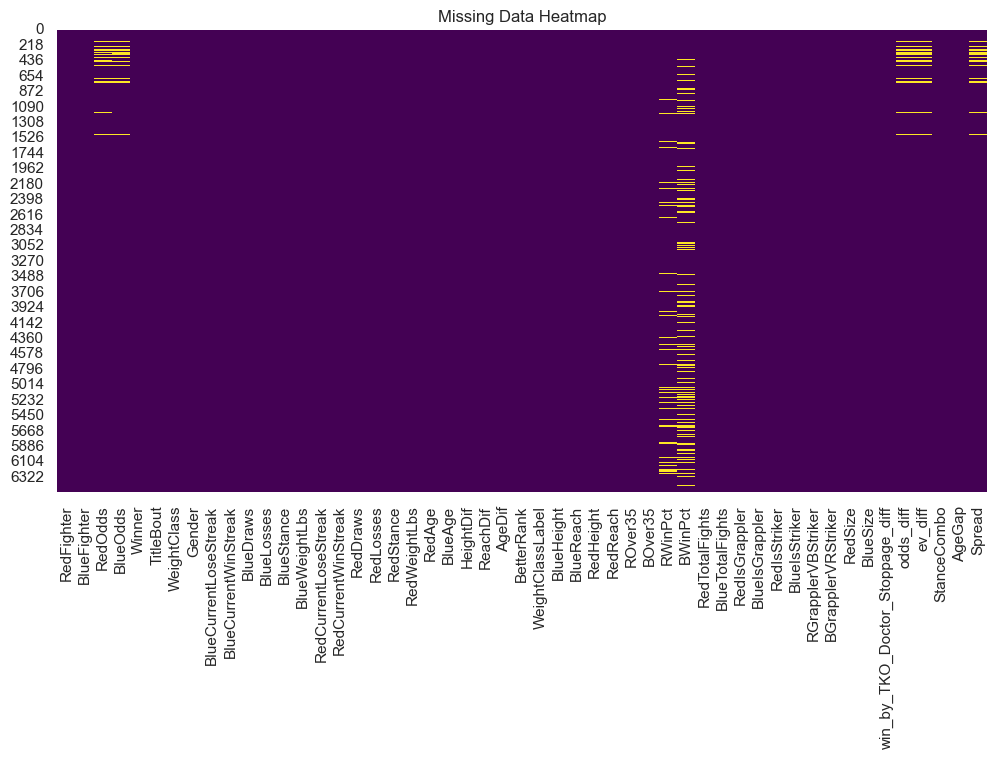

Missing percentages per column:
 RedFighter                          0.000000
BlueFighter                         0.000000
RedOdds                             3.477328
BlueOdds                            3.462010
Winner                              0.000000
TitleBout                           0.000000
WeightClass                         0.000000
Gender                              0.000000
BlueCurrentLoseStreak               0.000000
BlueCurrentWinStreak                0.000000
BlueDraws                           0.000000
BlueLosses                          0.000000
BlueStance                          0.045956
BlueWeightLbs                       0.000000
RedCurrentLoseStreak                0.000000
RedCurrentWinStreak                 0.000000
RedDraws                            0.000000
RedLosses                           0.000000
RedStance                           0.000000
RedWeightLbs                        0.000000
RedAge                              0.000000
BlueAge               

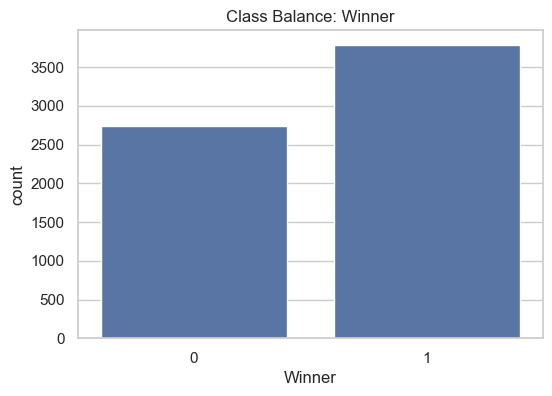

Class proportions:
Winner
1    0.580116
0    0.419884
Name: proportion, dtype: float64


In [287]:
# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
fig_name = "missing_data_heatmap2"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Missing values per column (%)
missing_percent = df.isnull().sum() * 100 / len(df)
print("Missing percentages per column:\n", missing_percent)

# Class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Winner', data=df)
plt.title('Class Balance: Winner')
fig_name = "class_balance_winner"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Display proportions
print("Class proportions:")
print(df['Winner'].value_counts(normalize=True))


In [288]:
# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Winner') if 'Winner' in num_cols else None

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['TitleBout', 'BlueStance', 'RedStance', 'BetterRank', 'WeightClassLabel', 'StanceCombo']
Numerical columns: ['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'WeightClass', 'Gender', 'BlueCurrentLoseStreak', 'BlueCurrentWinStreak', 'BlueDraws', 'BlueLosses', 'BlueWeightLbs', 'RedCurrentLoseStreak', 'RedCurrentWinStreak', 'RedDraws', 'RedLosses', 'RedWeightLbs', 'RedAge', 'BlueAge', 'HeightDif', 'ReachDif', 'AgeDif', 'BlueHeight', 'BlueReach', 'RedHeight', 'RedReach', 'ROver35', 'BOver35', 'RWinPct', 'BWinPct', 'RedTotalFights', 'BlueTotalFights', 'RedIsGrappler', 'BlueIsGrappler', 'RedIsStriker', 'BlueIsStriker', 'RGrapplerVBStriker', 'BGrapplerVRStriker', 'RedSize', 'BlueSize', 'win_by_TKO_Doctor_Stoppage_diff', 'odds_diff', 'ev_diff', 'AgeGap', 'Spread']


In [289]:
#DummyClassifier = baseline to compare better model's performance later 
# base_model = DummyClassifier(random_state=42)
# base_model.fit(X_train,y_train)
# preds = base_model.predict(X_valid)
# accuracy_score(y_valid, preds)



STRONGLY CORRELATED PAIRS (|r| ≥ 0.50)
                 Feature_1           Feature_2  Correlation
125                RedOdds           odds_diff     0.991816
166               BlueOdds           odds_diff     0.990186
984              odds_diff             ev_diff     0.984505
812               RedReach             RedSize     0.979474
126                RedOdds             ev_diff     0.976921
774              BlueReach            BlueSize     0.975792
167               BlueOdds             ev_diff     0.974324
793              RedHeight             RedSize     0.969695
433          BlueWeightLbs        RedWeightLbs     0.965231
87                 RedOdds            BlueOdds     0.964238
753             BlueHeight            BlueSize     0.963343
780              RedHeight            RedReach     0.900542
569              RedLosses      RedTotalFights     0.895224
415             BlueLosses     BlueTotalFights     0.887705
737             BlueHeight           BlueReach     0.881352


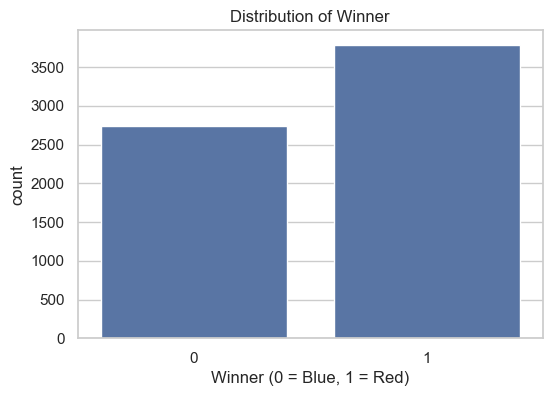


Updated feature count after removing correlated vars:
Numeric: 23
Categorical: 6


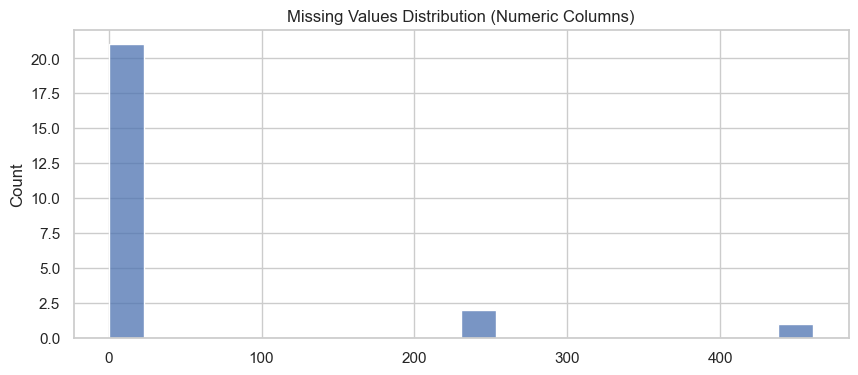


Numeric Summary Stats:



,count,mean,std,min,25%,50%,75%,max
RedFighter,6528.0,819.761795,476.188466,0.00,419.00,806.000000,1241.250000,1660.00
BlueFighter,6528.0,942.707874,556.368724,0.00,462.00,922.500000,1427.000000,1921.00
Winner,6528.0,0.580116,0.493577,0.00,0.00,1.000000,1.000000,1.00
WeightClass,6528.0,5.503370,3.200274,0.00,3.00,6.000000,8.000000,12.00
BlueCurrentLoseStreak,6528.0,0.501072,0.794303,0.00,0.00,0.000000,1.000000,6.00
BlueCurrentWinStreak,6528.0,0.957567,1.406786,0.00,0.00,0.000000,1.000000,12.00
BlueDraws,6528.0,0.023131,0.156327,0.00,0.00,0.000000,0.000000,2.00
RedCurrentLoseStreak,6528.0,0.622243,0.872301,0.00,0.00,0.000000,1.000000,7.00
RedCurrentWinStreak,6528.0,1.101562,1.760767,0.00,0.00,0.000000,2.000000,18.00
RedDraws,6528.0,0.031097,0.187999,0.00,0.00,0.000000,0.000000,2.00


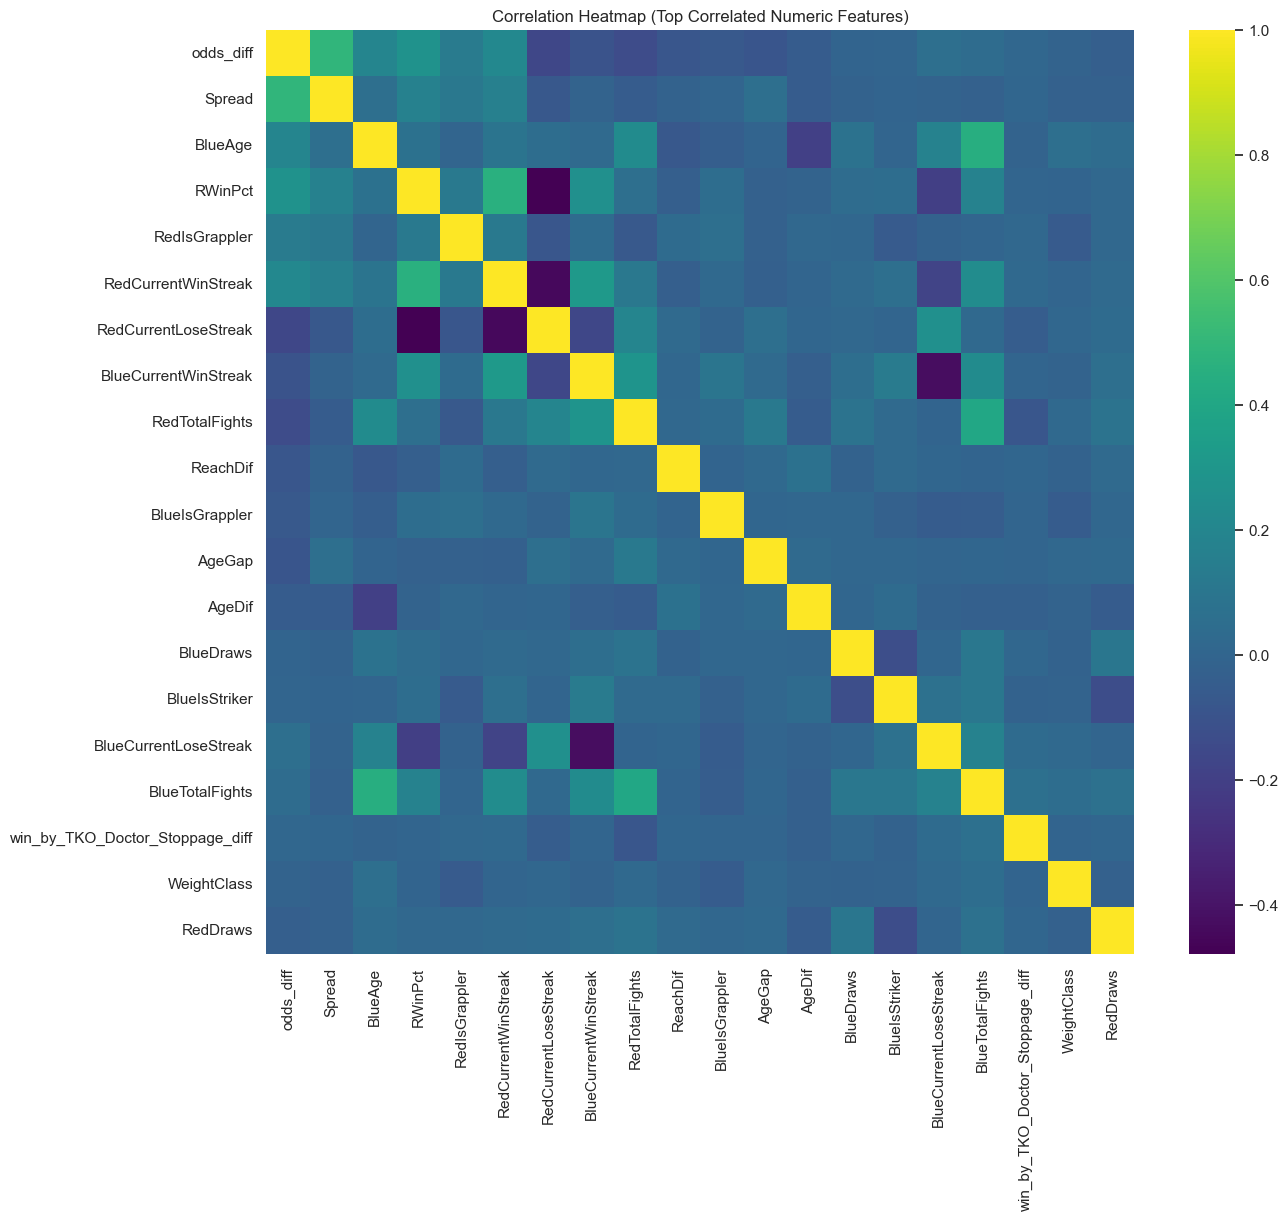

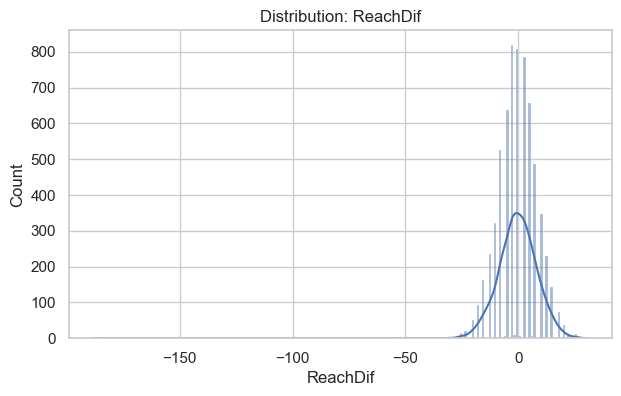

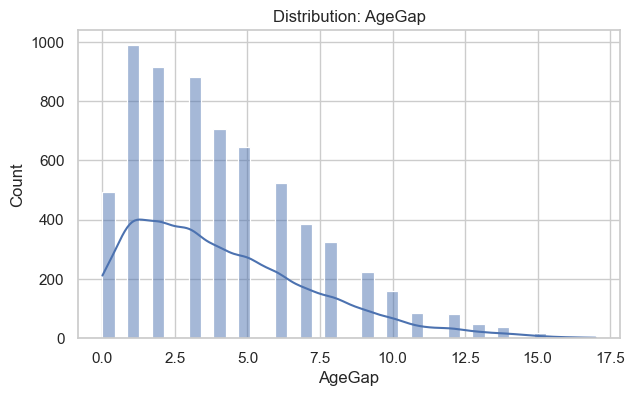

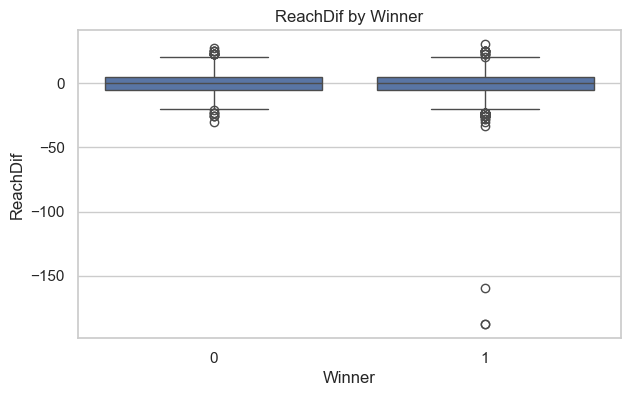

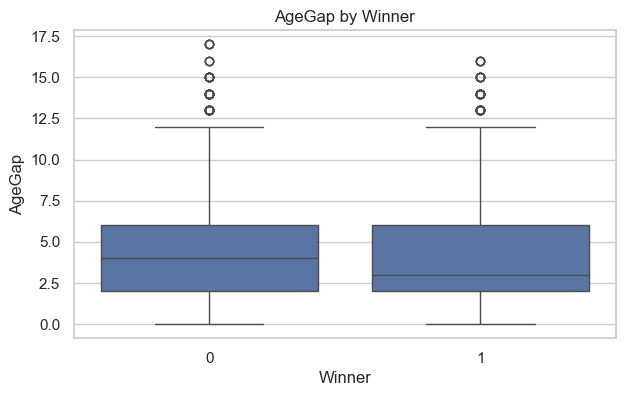

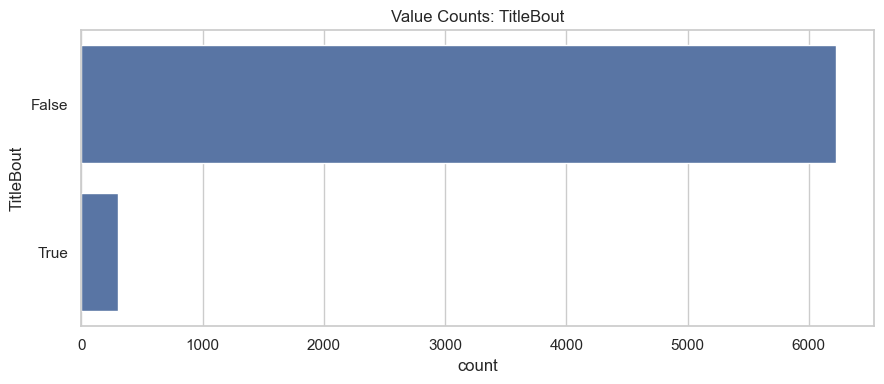

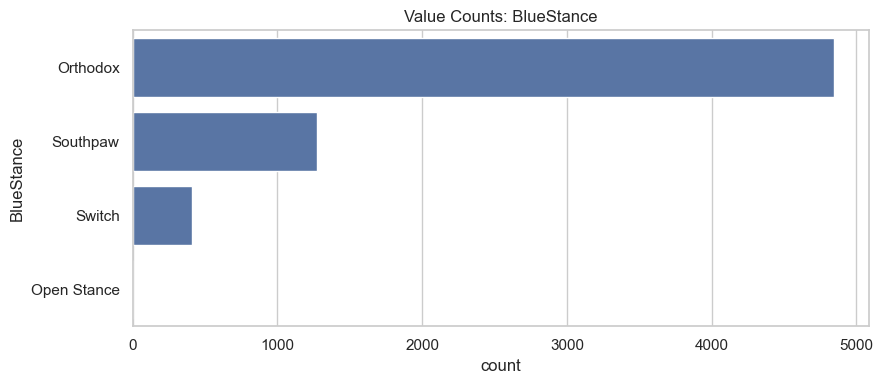

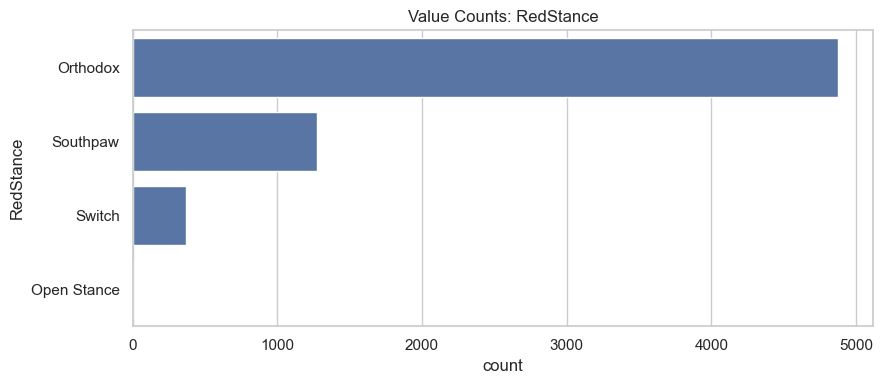

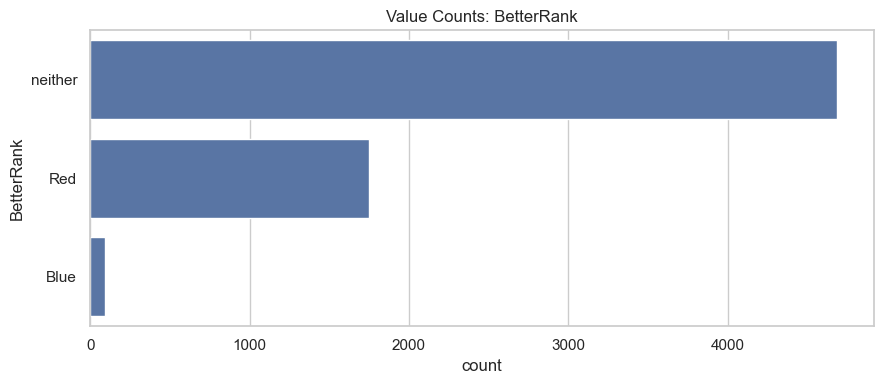

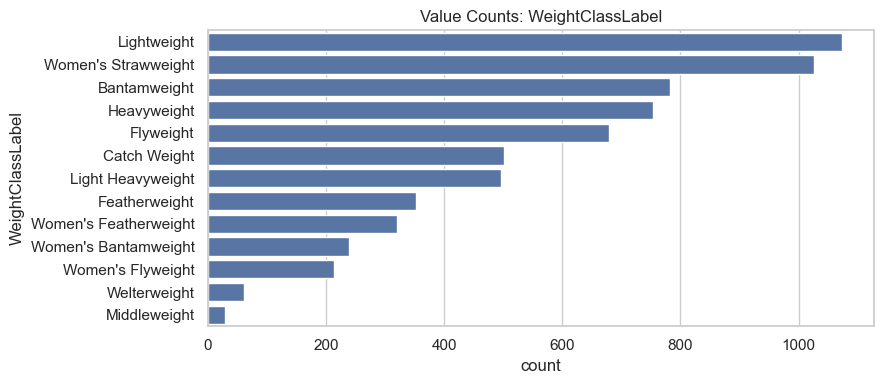

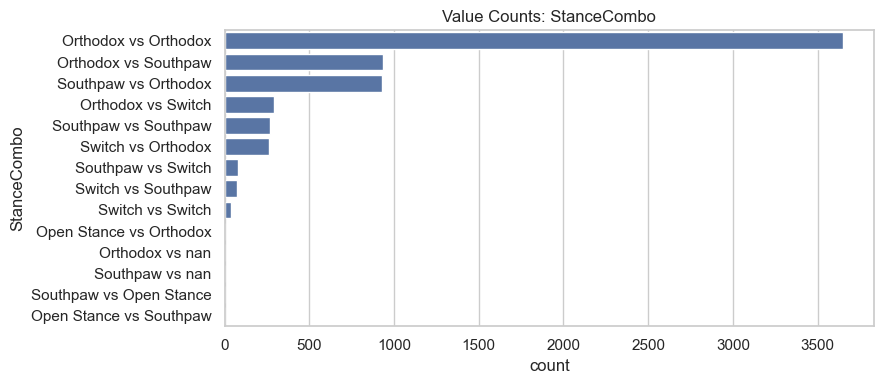


-----------------
 EDA COMPLETE
-----------------


In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------------------------------------
# drop strongly corr ftrs  (|r| ≥ 0.50)
# -----------------------------------------------------------

num_df = df.select_dtypes(include=['int64','float64'])
corr_matrix = num_df.corr().abs()

# Keep only upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Strong correlation pairs
strong_pairs = (
    upper.stack()
         .reset_index()
         .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
)
strong_pairs = strong_pairs[strong_pairs["Correlation"] >= 0.50]

print("\nSTRONGLY CORRELATED PAIRS (|r| ≥ 0.50)")
print(strong_pairs.sort_values("Correlation", ascending=False))

# Choose lower variance feature from each pair
to_drop_corr = set()
for f1, f2, corr_val in strong_pairs.values:
    var1 = num_df[f1].var()
    var2 = num_df[f2].var()
    drop_feature = f1 if var1 < var2 else f2
    to_drop_corr.add(drop_feature)

print("\nDropping correlated features:")
print(to_drop_corr)

# Drop from df_clean
df_clean = df.drop(columns=list(to_drop_corr), errors='ignore')

# Rebuild num_df using cleaned df
num_df = df_clean.select_dtypes(include=['int64','float64'])

# ---------------------
# Load features + target
# ---------------------
X = df_clean.drop(columns=['Winner'])
y = df_clean['Winner']

print("Raw feature columns:")
print(X.columns.tolist())



print("\nFeatures considered for modeling:")
print(X.columns.tolist())

# -----------------------------------------
#                EDA
# -----------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

print("\n==============================")
print(" BASIC DATA OVERVIEW")
print("==============================")
print(df_clean.head())
print("\nShape:", df_clean.shape)
print("\nData types:\n", df_clean.dtypes)
print("\nMissing values per column:\n", df_clean.isna().sum().sort_values(ascending=False))


# -----------------------------------------------------------
# Target variable distribution
# -----------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=df_clean['Winner'])
plt.title("Distribution of Winner")
plt.xlabel("Winner (0 = Blue, 1 = Red)")
fig_name = "dist_winner_rb"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

num_df = X.select_dtypes(include=['int64','float64'])
cat_df = X.select_dtypes(include=['object', 'category'])

print("\nUpdated feature count after removing correlated vars:")
print("Numeric:", len(num_df.columns))
print("Categorical:", len(cat_df.columns))

# rebuild cleaned num_df
num_df = df_clean.select_dtypes(include=['int64','float64'])



plt.figure(figsize=(10,4))
sns.histplot(num_df.isna().sum(), bins=20)
plt.title("Missing Values Distribution (Numeric Columns)")
fig_name = "numeric_missing"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()

print("\nNumeric Summary Stats:\n")
display(num_df.describe().T)



# -----------------------------------------------------------
# Correlation Heatmap (top 20 strongest correlations)
# -----------------------------------------------------------
plt.figure(figsize=(14,12))
corr = num_df.corr()

# keep strongest correlations with target
if 'Winner' in corr.columns:
    target_corr = corr['Winner'].abs().sort_values(ascending=False)[1:21]
    top_corr_cols = target_corr.index.tolist()
else:
    top_corr_cols = num_df.columns[:20]

sns.heatmap(num_df[top_corr_cols].corr(), annot=False, cmap='viridis')
plt.title("Correlation Heatmap (Top Correlated Numeric Features)")
fig_name = "corr_heatmap_num"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


# -----------------------------------------------------------
# Distribution plots for key variables
# -----------------------------------------------------------

cols_to_plot = [
    'ReachDif', 'HeightDif', 'Oddsdiff',
    'ev_diff', 'AgeGap'
]
cols_to_plot = [c for c in cols_to_plot if c in df_clean.columns]

for col in cols_to_plot:
    plt.figure(figsize=(7,4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f"Distribution: {col}")
    fig_name = "dist_cols_to_plot"
    fig_path = os.path.join(output_folder, f"{fig_name}.png")
    plt.savefig(fig_path, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()


# -----------------------------------------------------------
# Boxplots of numeric variables by Winner
# -----------------------------------------------------------
for col in cols_to_plot:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df_clean["Winner"], y=df_clean[col])
    plt.title(f"{col} by Winner")
    fig_name = "boxplot_winner"
    fig_path = os.path.join(output_folder, f"{fig_name}.png")
    plt.savefig(fig_path, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()


# -----------------------------------------------------------
# Categorical feature frequencies
# -----------------------------------------------------------
cat_df = df_clean.select_dtypes(include=['object','category'])

for col in cat_df.columns:
    plt.figure(figsize=(9,4))
    sns.countplot(y=df_clean[col], order=df_clean[col].value_counts().index)
    plt.title(f"Value Counts: {col}")
    plt.tight_layout()
    fig_name = "last_eda"
    fig_path = os.path.join(output_folder, f"{fig_name}.png")
    plt.savefig(fig_path, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()

print("\n-----------------")
print(" EDA COMPLETE")
print("-----------------")

In [291]:
# ----------------------------------------
# MICE and preprocess 
# ----------------------------------------
# ----------------------------------------
#   split — matchup safe - for leakage 
# ----------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupShuffleSplit

print("\n----------------------------------------")
print(" Creating matchup-safe split")
print("----------------------------------------")

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(df_clean["Winner"])

# Build matchup ID
df_clean["MatchupID"] = df_clean.apply(
    lambda row: "_".join(sorted([
        str(row.get("RedFighter", "")),
        str(row.get("BlueFighter", ""))
    ])),
    axis=1
)

# Build X and y
X = df_clean.drop(columns=["Winner"])
y = y_enc

# Group-based split
gss = GroupShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=df_clean["MatchupID"]))

X_train = X.iloc[train_idx].reset_index(drop=True)
X_test  = X.iloc[test_idx].reset_index(drop=True)
y_train = y[train_idx]
y_test  = y[test_idx]

# Drop identifiers (not allowed in model)
drop_cols = ["RedFighter", "BlueFighter", "MatchupID", "win_by_TKO_Doctor_Stoppage_diff"] #win_by_TKO_Doctor_Stoppage_diff
X_train = X_train.drop(columns=[c for c in drop_cols if c in X_train.columns])
X_test  = X_test.drop(columns=[c for c in drop_cols if c in X_test.columns])

# ----------------------------------------
# Recompute num and cat cols
# ----------------------------------------
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nUpdated numeric columns:", len(num_cols))
print("Updated categorical columns:", len(cat_cols))

# ----------------------------------------
#   MICEFOREST — for num training data 
# ----------------------------------------
import miceforest as mf

print("\nRunning MICE-Forest Imputation on TRAINING numeric columns...")

# Extract numeric-only
X_train_num = X_train[num_cols].reset_index(drop=True)
X_test_num  = X_test[num_cols].reset_index(drop=True)

# Ensure column names strings
X_train_num.columns = X_train_num.columns.astype(str)
X_test_num.columns  = X_test_num.columns.astype(str)

# ---- FIT MICE ON TRAIN ONLY ----
kernel = mf.ImputationKernel(
    data=X_train_num,
    save_all_iterations_data=True,
    random_state=42
)

kernel.mice(
    iterations=3,
    n_estimators=50
)

# ---- COMPLETE TRAIN ----
completed_train = kernel.complete_data()

# ---- IMPUTE TEST USING THE TRAINING KERNEL ----
completed_test = kernel.impute_new_data(X_test_num).complete_data()

# Put imputed values back
X_train[num_cols] = completed_train.values
X_test[num_cols]  = completed_test.values

print("MICE Imputation Completed (train-fit only).\n")

# ----------------------------------------
#   preprocessing pipeline 
# ----------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)



----------------------------------------
 Creating matchup-safe split
----------------------------------------

Updated numeric columns: 20
Updated categorical columns: 6

Running MICE-Forest Imputation on TRAINING numeric columns...
MICE Imputation Completed (train-fit only).



In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings('ignore')

from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import (
    train_test_split, GridSearchCV, KFold
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_auc_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GroupKFold


# --------------------------------------------------------------------
#  Machine Learning Pipelines
# --------------------------------------------------------------------
pipelines = {
    'LogisticRegression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),

    'RandomForest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),

    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True))
    ]),

    'XGBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(eval_metric='logloss'))
    ])
}

# -------------------------------------------------------------------
#  Hyperparameter Grids
# --------------------------------------------------------------------
#shifted LR parameters down as 0.1 was best performing in first run  
#ended up shifting several parameters down post-ppt
param_grids = {
    'LogisticRegression': {'classifier__C': [0.0001, 0.001, 0.01, 0.1]},
    'RandomForest': {
        'classifier__n_estimators': [100, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [5,10]
    },

    'SVM': {
        'classifier__C': [0.001, 0.01, 0.1],
        'classifier__kernel': ['rbf', 'linear']
    },

    'XGBoost': {
        'classifier__n_estimators': [100, 300],
        'classifier__max_depth': [1, 3],
        'classifier__learning_rate': [0.001, 0.01]
    }
}

In [293]:
# ----------------------------------------
# (3 seeds × 5-fold CV)
# ----------------------------------------
import joblib

nr_states = 3
kf_splits = 5
results_summary = {}

for name, base_pipeline in pipelines.items():

    print(f"\n----------------------------------------")
    print(f"Training {name}")
    print(f"----------------------------------------")

    test_scores = []
    best_param_list = []
    final_models = []

    for seed in range(1, nr_states + 1):

        print(f"\n--- Random State {seed} ---")

        # Clone pipeline to ensure fresh model each iteration
        pipeline = clone(base_pipeline)

        # Ensure reproducibility for models that support random_state
        if name in ["RandomForest", "XGBoost", "LogisticRegression"]:
            pipeline.named_steps["classifier"].set_params(random_state=seed)

        # CV strategy
        cv = StratifiedKFold(
            n_splits=kf_splits, shuffle=True, random_state=seed
        )

        # Grid search
        grid = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grids[name],
            scoring="accuracy",
            cv=cv,
            n_jobs=-1
        )

        grid.fit(X_train, y_train)

        # Store best estimator for this seed
        best_model = grid.best_estimator_
        final_models.append(best_model)
        best_param_list.append(grid.best_params_)

        # Evaluate on test set
        y_pred = best_model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        test_scores.append(acc)

        print(f"Best params: {grid.best_params_}")
        print(f"CV accuracy: {grid.best_score_:.4f}")
        print(f"Test accuracy: {acc:.4f}")

    # ----------------------------------------------
    # Aggregate results across random seeds - need average 
    # ----------------------------------------------
    avg_test_score = np.mean(test_scores)
    std_test_score = np.std(test_scores)
    best_test_score = np.max(test_scores)

    print(f"\nAverage Test Accuracy for {name}: {avg_test_score:.4f}")

    results_summary[name] = {
        "test_scores": test_scores,
        "avg_test_score": avg_test_score,
        "std_test_score": std_test_score,
        "best_test_score": best_test_score,
        "best_params": best_param_list,
        "models": final_models
    }

    # ----------------------------------------------
    # Save best model (pick the seed with highest test accuracy) for results in git repo 
    # ----------------------------------------------
    best_model_idx = np.argmax(test_scores)
    best_model_overall = final_models[best_model_idx]

    save_path = f"best_model_{name}.pkl"
    joblib.dump(best_model_overall, save_path)

    print(f"Saved best {name} model → {save_path}")


# ----------------------------------------
#              COMPILE FINAL RESULTS TABLE
# ----------------------------------------

results_table = []

for model_name, info in results_summary.items():

    rows = {
        "Algorithm": model_name,
        "Best params (seed 1)": info["best_params"][0],
        "Mean test accuracy": round(info["avg_test_score"], 4),
        "Std test accuracy": round(info["std_test_score"], 4),
        "Best test accuracy (across seeds)": round(info["best_test_score"], 4)
    }

    results_table.append(rows)

results_table = pd.DataFrame(results_table)

print("\n\n----------------------------------------")
print("       FINAL RESULTS TABLE")
print("----------------------------------------\n")
print(results_table)



----------------------------------------
Training LogisticRegression
----------------------------------------

--- Random State 1 ---
Best params: {'classifier__C': 0.1}
CV accuracy: 0.6560
Test accuracy: 0.6458

--- Random State 2 ---
Best params: {'classifier__C': 0.01}
CV accuracy: 0.6595
Test accuracy: 0.6489

--- Random State 3 ---
Best params: {'classifier__C': 0.01}
CV accuracy: 0.6556
Test accuracy: 0.6489

Average Test Accuracy for LogisticRegression: 0.6478
Saved best LogisticRegression model → best_model_LogisticRegression.pkl

----------------------------------------
Training RandomForest
----------------------------------------

--- Random State 1 ---
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
CV accuracy: 0.6512
Test accuracy: 0.6473

--- Random State 2 ---
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
CV accuracy: 0.6508
Test accuracy: 

Index(['Algorithm', 'Best params (seed 1)', 'Mean test accuracy',
       'Std test accuracy', 'Best test accuracy (across seeds)'],
      dtype='object')
            Algorithm                               Best params (seed 1)  \
0  LogisticRegression                             {'classifier__C': 0.1}   
1        RandomForest  {'classifier__max_depth': 10, 'classifier__min...   
2                 SVM  {'classifier__C': 0.1, 'classifier__kernel': '...   
3             XGBoost  {'classifier__learning_rate': 0.01, 'classifie...   

   Mean test accuracy  Std test accuracy  Best test accuracy (across seeds)  
0              0.6478             0.0014                             0.6489  
1              0.6443             0.0029                             0.6473  
2              0.6550             0.0011                             0.6557  
3              0.6590             0.0040                             0.6618  


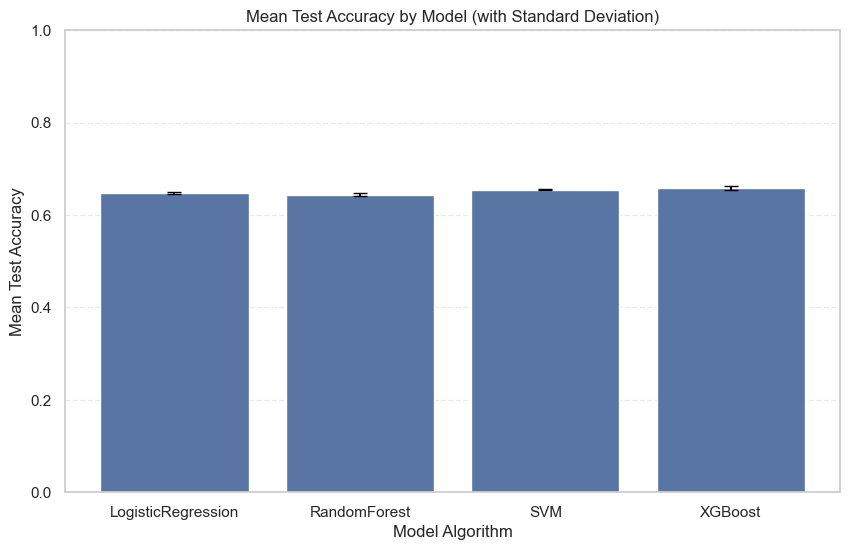

In [294]:
# --------------------------------------------------------------------
# Plot: Mean Test Accuracy by Model Algorithm
# --------------------------------------------------------------------
import seaborn as sns 
import matplotlib.pyplot as plt

print(results_table.columns)
print(results_table.head())
plt.figure(figsize=(10,6))
sns.barplot(
    data=results_table,
    x="Algorithm",               # check corrected column name - check 
    y="Mean test accuracy",      # check corrected column name - check 
    ci=None
)

# Add error bars manually using standard deviation
for i, row in results_table.iterrows():
    plt.errorbar(
        i,
        row["Mean test accuracy"],  # check corrected column name - check 
        yerr=row["Std test accuracy"],  # check corrected column name - check 
        fmt="none",
        capsize=5,
        color="black"
    )

plt.title("Mean Test Accuracy by Model (with Standard Deviation)")
plt.xlabel("Model Algorithm")
plt.ylabel("Mean Test Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
fig_name = "test_acc_mean"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()


In [295]:
# ----------------------------------------
#   metrics 
# ----------------------------------------

import numpy as np
import shap
from sklearn.metrics import accuracy_score, fbeta_score, f1_score
from sklearn.inspection import permutation_importance

print("\n\n----------------------------------------")
print("     BASELINES + CHECK SHAP/PERMUTATION INPUTS")
print("----------------------------------------n")

# -------------------------------------------------------
# FINAL FITTED PREPROCESSOR of the BEST MODEL
# -------------------------------------------------------
best_global_model_name = max(results_summary, key=lambda m: results_summary[m]["avg_test_score"])
best_pipeline = results_summary[best_global_model_name]["models"][0]
fitted_preprocessor = best_pipeline.named_steps["preprocessor"]

# Feature names from trained preprocessor
try:
    feature_names = fitted_preprocessor.get_feature_names_out()
except:
    feature_names = X_train.columns.tolist()

# Preprocessed matrices (same one SHAP will use)
X_train_trans = fitted_preprocessor.transform(X_train)
X_test_trans  = fitted_preprocessor.transform(X_test)

# Convert sparse → dense only if necessary as per error messages 
X_train_dense = X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else np.asarray(X_train_trans)
X_test_dense  = X_test_trans.toarray()  if hasattr(X_test_trans,  "toarray") else np.asarray(X_test_trans)

print("Shapes after preprocessing:")
print("  X_train_trans:", X_train_trans.shape)
print("  X_test_trans :", X_test_trans.shape)


# -------------------------------------------------------
# baseline metrics 
# -------------------------------------------------------
(unique, counts) = np.unique(y_train, return_counts=True)
majority_label = unique[np.argmax(counts)]
baseline_preds = np.full_like(y_test, fill_value=majority_label)

baseline_acc  = accuracy_score(y_test, baseline_preds)
baseline_f05 = fbeta_score(y_test, baseline_preds, beta=0.5, average='macro', zero_division=0)
baseline_f1  = f1_score(y_test, baseline_preds, average='macro', zero_division=0)
baseline_f2  = fbeta_score(y_test, baseline_preds, beta=2, average='macro', zero_division=0)

print("\n=== BASELINE (majority class) ===")
print(f"Majority label: {majority_label}")
print(f"Accuracy: {baseline_acc:.4f}")
print(f"F0.5 (macro): {baseline_f05:.4f}")
print(f"F1   (macro): {baseline_f1:.4f}")
print(f"F2   (macro): {baseline_f2:.4f}")


# Non-1D columns would break SHAP/permutation importance
bad_cols = [
    c for c in X_train.columns
    if isinstance(X_train[c].iloc[0], (list, dict, tuple))
]

if bad_cols:
    print("⚠️ Removing non-1D columns:", bad_cols)
    X_train = X_train.drop(columns=bad_cols, errors="ignore")
    X_test  = X_test.drop(columns=bad_cols, errors="ignore")


# -------------------------------------------------------
# shiyu note from meeting: check shape 
# -------------------------------------------------------
for model_name, info in results_summary.items():
    model_check = info["models"][0]
    try:
        preds_check = model_check.predict(X_test)
        print(f"{model_name} prediction length: {len(preds_check)}  | y_test: {len(y_test)}")
        if len(preds_check) != len(y_test):
            print("❌ MISMATCH! Predictions don't align with y_test.")
        else:
            print("✅ OK — predictions match test labels.")
    except Exception as e:
        print(f"{model_name} prediction failed: {e}")

print("\n------- Completed SHAP/Permutation Prep Block -------\n")




----------------------------------------
     BASELINES + CHECK SHAP/PERMUTATION INPUTS
----------------------------------------n
Shapes after preprocessing:
  X_train_trans: (5218, 60)
  X_test_trans : (1310, 60)

=== BASELINE (majority class) ===
Majority label: 1
Accuracy: 0.5947
F0.5 (macro): 0.3236
F1   (macro): 0.3729
F2   (macro): 0.4400
LogisticRegression prediction length: 1310  | y_test: 1310
✅ OK — predictions match test labels.
RandomForest prediction length: 1310  | y_test: 1310
✅ OK — predictions match test labels.
SVM prediction length: 1310  | y_test: 1310
✅ OK — predictions match test labels.
XGBoost prediction length: 1310  | y_test: 1310
✅ OK — predictions match test labels.

------- Completed SHAP/Permutation Prep Block -------



In [296]:
# --------------------------------------------------------------------
# Compare models to baseline; compute permutation importance + impurity + SHAP
# --------------------------------------------------------------------
summary_rows = []
global_importances_all = []  

for model_name, info in results_summary.items():
    print(f"\n\n--------- ANALYZING {model_name} ---------")

    # Best model (first index in stored list)
    pipeline_best = info["models"][0]
    classifier = pipeline_best.named_steps["classifier"]

    # -------------------------- Metrics ---------------------------
    y_test_pred = pipeline_best.predict(X_test)

    acc = accuracy_score(y_test, y_test_pred)
    f05 = fbeta_score(y_test, y_test_pred, beta=0.5, average="macro", zero_division=0)
    f1  = f1_score(y_test, y_test_pred, average="macro", zero_division=0)
    f2  = fbeta_score(y_test, y_test_pred, beta=2, average="macro", zero_division=0)

    mean_test = info.get("avg_test_score", np.mean(info["test_scores"]))
    std_test  = np.std(info["test_scores"]) if "test_scores" in info else np.nan

    z_score = (mean_test - baseline_acc) / std_test if std_test and std_test > 0 else np.nan

    print(f"Mean CV/Test (avg across states): {mean_test:.4f} (std: {std_test:.4f})")
    print(f"Test accuracy: {acc:.4f}")
    print(f"F0.5/F1/F2: {f05:.4f} / {f1:.4f} / {f2:.4f}")
    print(f"Z-score above baseline: {z_score if not np.isnan(z_score) else 'N/A'}")

    # -------------------------- Impurity Importance ---------------------------
    impurity_df = None
    if hasattr(classifier, "feature_importances_"):
        try:
            impurity_df = (
                pd.DataFrame({
                    "feature": feature_names,
                    "impurity_importance": classifier.feature_importances_
                }).sort_values("impurity_importance", ascending=False)
            )
            print("Impurity importance computed.")
        except Exception as e:
            print("Impurity importance failed:", e)

    # -------------------------- Permutation Importance ---------------------------
    perm_df = None
    try:
        classifier = pipeline_best.named_steps["classifier"]
        preprocessor = pipeline_best.named_steps["preprocessor"]
        
        X_test_trans = preprocessor.transform(X_test)
        
        #parameters for times sake 
        perm = permutation_importance(
            classifier,
            X_test_trans,
            y_test,
            n_repeats=20,
            random_state=42,
            n_jobs=-1,
            scoring="accuracy"
        )
        
        feature_names = preprocessor.get_feature_names_out()
        
        perm_df = pd.DataFrame({
            "feature": feature_names,
            "perm_mean": perm.importances_mean,
            "perm_std": perm.importances_std
        }).sort_values("perm_mean", ascending=False)

        print("Permutation importance computed.")
        print("\nTop 10 permutation importances:")
        print(perm_df.head(10))
    except Exception as e:
        print("Permutation importance failed:", e)


    # -------------------------- Transform Train/Test Once ---------------------------
    pre = pipeline_best.named_steps["preprocessor"]

    X_train_trans = pre.transform(X_train)
    X_test_trans  = pre.transform(X_test)

    # convert to dense
    X_train_dense = X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else X_train_trans
    X_test_dense  = X_test_trans.toarray()  if hasattr(X_test_trans, "toarray") else X_test_trans

    # -------------------------- SHAP Global Importance ---------------------------
    shap_df = None
    explainer = None

    try:
        X_shap_background = X_train_dense[:200]

        explainer = shap.Explainer(
            classifier,
            X_shap_background,
            feature_names=feature_names
        )

        shap_values = explainer(X_train_dense[:500])
        vals = shap_values.values

        # multiclass = list of arrays → average abs val over classes
        if isinstance(vals, list) or (hasattr(vals, "dtype") and vals.dtype == object):
            arrs = [np.abs(v).mean(axis=0) for v in vals]
            mean_abs_shap = np.mean(arrs, axis=0)
        else:
            mean_abs_shap = np.abs(vals).mean(axis=0)

        shap_df = pd.DataFrame({
            "feature": feature_names,
            "shap_mean_abs": mean_abs_shap
        }).sort_values("shap_mean_abs", ascending=False)

        print("SHAP global importance computed.")
    except Exception as e:
        print("SHAP global importances failed:", e)

    # -------------------------- Combine importances ---------------------------
    imp_combined = pd.DataFrame({"feature": feature_names})

    if impurity_df is not None:
        imp_combined = imp_combined.merge(impurity_df, on="feature", how="left")

    if perm_df is not None:
        imp_combined = imp_combined.merge(perm_df[["feature", "perm_mean"]], on="feature", how="left")

    if shap_df is not None:
        imp_combined = imp_combined.merge(shap_df, on="feature", how="left")

    # Normalize
    for col in ["impurity_importance", "perm_mean", "shap_mean_abs"]:
        if col in imp_combined.columns:
            col_vals = imp_combined[col].fillna(0).values
            imp_combined[col + "_norm"] = (
                col_vals / col_vals.max() if col_vals.max() > 0 else 0
            )

    norm_cols = [c for c in imp_combined.columns if c.endswith("_norm")]
    if norm_cols:
        imp_combined["aggregate_score"] = imp_combined[norm_cols].mean(axis=1)
        imp_combined = imp_combined.sort_values("aggregate_score", ascending=False)

    global_importances_all.append((model_name, imp_combined))

    # -------------------------- Local SHAP ---------------------------
    local_shap_out = None
    if explainer is not None and shap_values is not None:
        try:
            n_local = min(3, X_test_dense.shape[0])
            local_vals = explainer(X_test_dense[:n_local])
            local_shap_out = {
                "instance_indices": list(range(n_local)),
                "local_values": local_vals.values,
                "expected_value": local_vals.base_values
            }
            print(f"Computed local SHAP for {n_local} samples.")

            # Print top 5 features per instance
            for i in range(n_local):
                instance_df = pd.DataFrame({
                    "feature": feature_names,
                    "shap_value": local_vals.values[i]
                }).sort_values("shap_value", key=abs, ascending=False)
                print(f"\nInstance {i} top 5 SHAP features:")
                print(instance_df.head(5))
        except Exception as e:
            print("Local SHAP failed:", e)

    # -------------------------- Collect summary row ---------------------------
    summary_rows.append({
        "Algorithms": model_name,
        "Best parameters (example)": info["best_params"][0] if info.get("best_params") else None,
        "Mean test score": round(mean_test, 4),
        "Std test score": round(std_test, 4) if not np.isnan(std_test) else None,
        "Test accuracy (best model)": round(acc, 4),
        "Test F0.5": round(f05, 4),
        "Test F1": round(f1, 4),
        "Test F2": round(f2, 4),
        "Z_score_above_baseline": round(z_score, 4) if not np.isnan(z_score) else None,
        "Top feature (aggregate)": imp_combined["feature"].iloc[0] if not imp_combined.empty else None,
        "Least feature (aggregate)": imp_combined["feature"].iloc[-1] if not imp_combined.empty else None,
        "local_shap_example": local_shap_out
    })





--------- ANALYZING LogisticRegression ---------
Mean CV/Test (avg across states): 0.6478 (std: 0.0014)
Test accuracy: 0.6458
F0.5/F1/F2: 0.6282 / 0.6265 / 0.6254
Z-score above baseline: 36.9463293169982
Permutation importance computed.

Top 10 permutation importances:
                                       feature  perm_mean  perm_std
17                              num__odds_diff   0.092137  0.010744
32                         cat__BetterRank_Red   0.002481  0.001944
50         cat__StanceCombo_Orthodox vs Switch   0.002214  0.000634
11                                num__RWinPct   0.001183  0.001610
5                     num__RedCurrentWinStreak   0.001031  0.001965
34          cat__WeightClassLabel_Bantamweight   0.001031  0.001624
14                          num__RedIsGrappler   0.000802  0.002334
21                         cat__TitleBout_True   0.000725  0.000743
10                                 num__AgeDif   0.000649  0.000437
43  cat__WeightClassLabel_Women's Bantamweight  

 99%|===================| 988/1000 [00:29<00:00]        

SHAP global importances failed: Per-column arrays must each be 1-dimensional
Computed local SHAP for 3 samples.
Local SHAP failed: Per-column arrays must each be 1-dimensional


--------- ANALYZING SVM ---------
Mean CV/Test (avg across states): 0.6550 (std: 0.0011)
Test accuracy: 0.6557
F0.5/F1/F2: 0.6328 / 0.6264 / 0.6243
Z-score above baseline: 55.861435713737386
Permutation importance computed.

Top 10 permutation importances:
                              feature  perm_mean  perm_std
17                     num__odds_diff   0.147748  0.010390
19                        num__Spread   0.015458  0.006694
40  cat__WeightClassLabel_Lightweight   0.002634  0.000614
10                        num__AgeDif   0.001832  0.000978
18                        num__AgeGap   0.001756  0.000545
16                 num__BlueIsStriker   0.001603  0.000867
5            num__RedCurrentWinStreak   0.001336  0.000585
0                    num__WeightClass   0.001221  0.001217
9                       num__Reach



=== Model performance summary vs baseline ===


,Algorithms,Best parameters (example),Mean test score,Std test score,Test accuracy (best model),Test F0.5,Test F1,Test F2,Z_score_above_baseline,Top feature (aggregate),Least feature (aggregate),local_shap_example
0,LogisticRegression,{'classifier__C': 0.1},0.6478,0.0014,0.6458,0.6282,0.6265,0.6254,36.9463,num__odds_diff,cat__StanceCombo_Orthodox vs Southpaw,"{'instance_indices': [0, 1, 2], 'local_values'..."
1,RandomForest,"{'classifier__max_depth': 10, 'classifier__min...",0.6443,0.0029,0.6473,0.6243,0.6189,0.6171,17.3720,num__odds_diff,cat__WeightClassLabel_Light Heavyweight,"{'instance_indices': [0, 1, 2], 'local_values'..."
2,SVM,"{'classifier__C': 0.1, 'classifier__kernel': '...",0.6550,0.0011,0.6557,0.6328,0.6264,0.6243,55.8614,num__odds_diff,cat__WeightClassLabel_Women's Bantamweight,"{'instance_indices': [0, 1, 2], 'local_values'..."
3,XGBoost,"{'classifier__learning_rate': 0.01, 'classifie...",0.6590,0.0040,0.6534,0.6318,0.6268,0.6249,16.2635,num__odds_diff,cat__StanceCombo_Switch vs Switch,"{'instance_indices': [0, 1, 2], 'local_values'..."


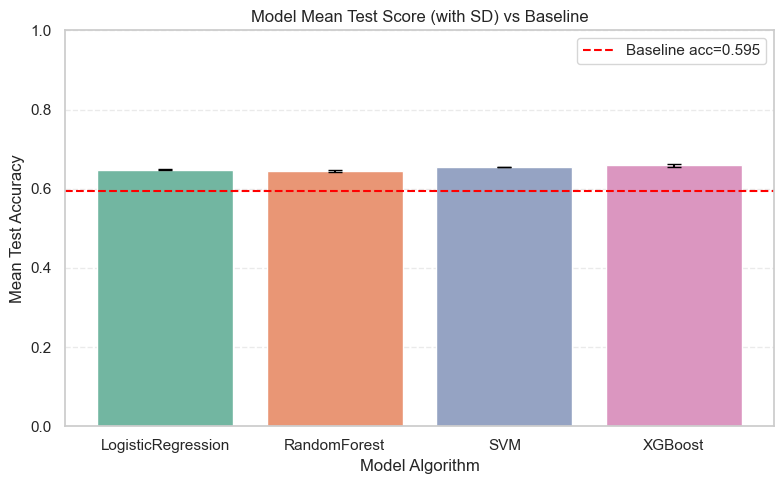

In [297]:
# ---------------------------
# Summary DataFrame
# ---------------------------
model_perf_df = pd.DataFrame(summary_rows)
print("\n\n=== Model performance summary vs baseline ===")
display(model_perf_df)

# ---------------------------
# Barplot of mean test score with error bars
# ---------------------------
plt.figure(figsize=(8,5))

# Create barplot
sns.barplot(
    data=model_perf_df,
    x='Algorithms',
    y='Mean test score',
    ci=None,
    palette='Set2'
)

# Add error bars
y_err = model_perf_df['Std test score'].fillna(0).values
plt.errorbar(
    x=np.arange(len(model_perf_df)),
    y=model_perf_df['Mean test score'].values,
    yerr=y_err,
    fmt='none',
    capsize=5,
    color='black'
)

# Baseline accuracy line
plt.axhline(baseline_acc, color='red', linestyle='--', label=f'Baseline acc={baseline_acc:.3f}')

# Labels and styling
plt.title("Model Mean Test Score (with SD) vs Baseline")
plt.ylabel("Mean Test Accuracy")
plt.xlabel("Model Algorithm")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
fig_name = "mean_test_acc_model"
fig_path = os.path.join(output_folder, f"{fig_name}.png")
plt.savefig(fig_path, bbox_inches="tight", dpi=300)
plt.show()
plt.close()



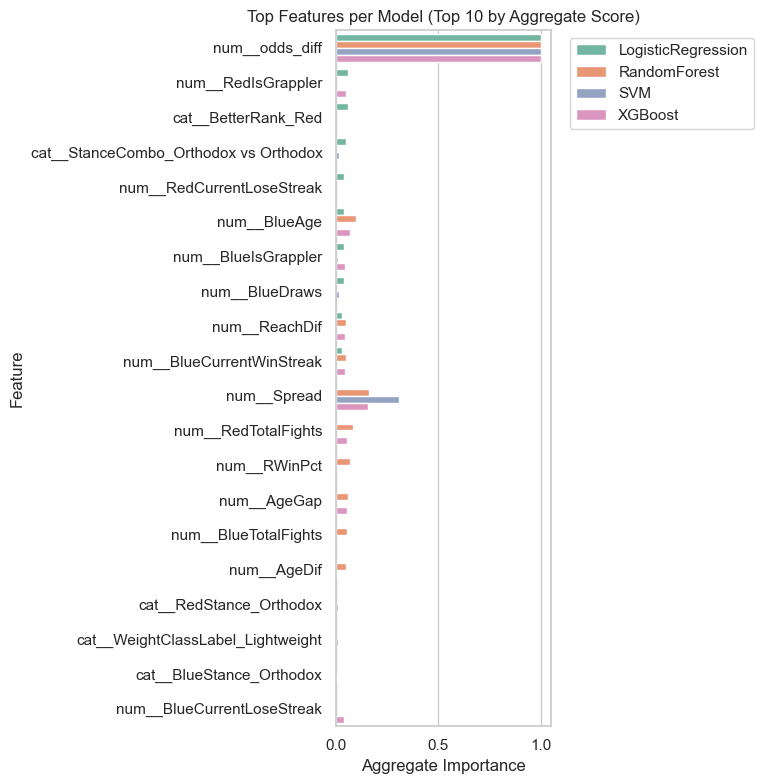

In [298]:
# --------------------------------------------------------------------
# Top features across models (aggregate)
# --------------------------------------------------------------------
import os 
top_feats_list = []

for model_name, imp_df in global_importances_all:
    # Use aggregate_score if available, otherwise fallback to SHAP
    score_col = 'aggregate_score' if 'aggregate_score' in imp_df.columns else 'shap_mean_abs'
    
    if score_col in imp_df.columns:
        top_feats = (
            imp_df.nlargest(10, score_col)[['feature', score_col]]
            .rename(columns={score_col: 'aggregate_score'})
            .assign(model=model_name)
        )
        top_feats_list.append(top_feats)

if top_feats_list:
    top_feats_all = pd.concat(top_feats_list, ignore_index=True)
    
    plt.figure(figsize=(8,8))
    sns.barplot(
        data=top_feats_all,
        x='aggregate_score',
        y='feature',
        hue='model',
        palette='Set2'
    )
    plt.title("Top Features per Model (Top 10 by Aggregate Score)")
    plt.xlabel("Aggregate Importance")
    plt.ylabel("Feature")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fig_name = "top_features_per_model"
    fig_path = os.path.join(output_folder, f"{fig_name}.png")
    plt.savefig(fig_path, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()
else:
    print("No feature importance data available to plot.")
    



----------------------------------------
 FINAL ANALYSIS: LogisticRegression
----------------------------------------


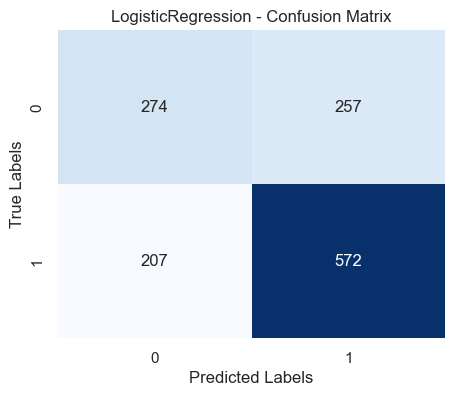

LogisticRegression AUROC: 0.6974
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       531
           1       0.69      0.73      0.71       779

    accuracy                           0.65      1310
   macro avg       0.63      0.63      0.63      1310
weighted avg       0.64      0.65      0.64      1310

SHAP failed for LogisticRegression: Unknown type passed as data object: <class 'shap.maskers._tabular.Independent'>


----------------------------------------
 FINAL ANALYSIS: RandomForest
----------------------------------------


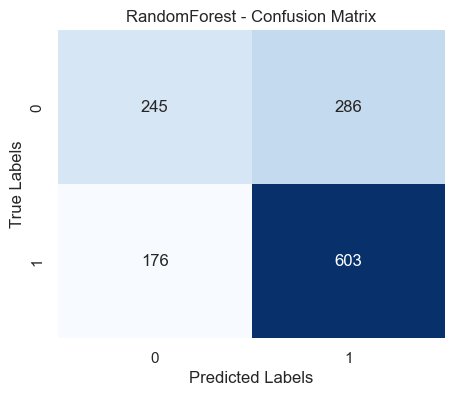

RandomForest AUROC: 0.6928
              precision    recall  f1-score   support

           0       0.58      0.46      0.51       531
           1       0.68      0.77      0.72       779

    accuracy                           0.65      1310
   macro avg       0.63      0.62      0.62      1310
weighted avg       0.64      0.65      0.64      1310



<Figure size 640x480 with 0 Axes>

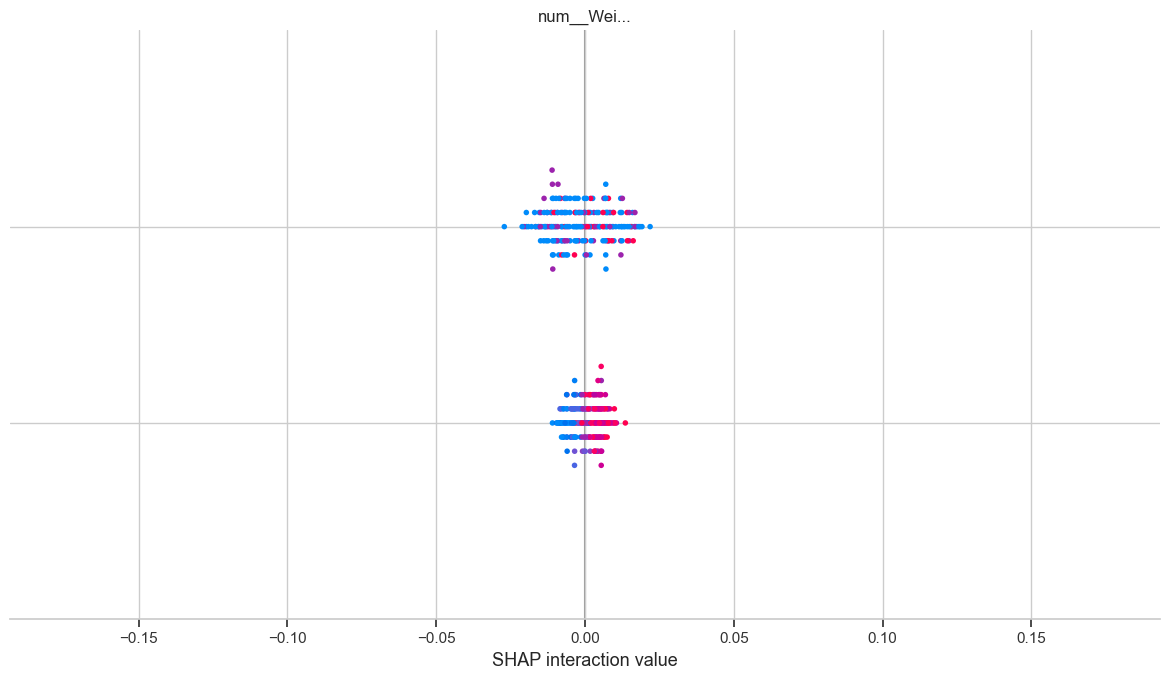

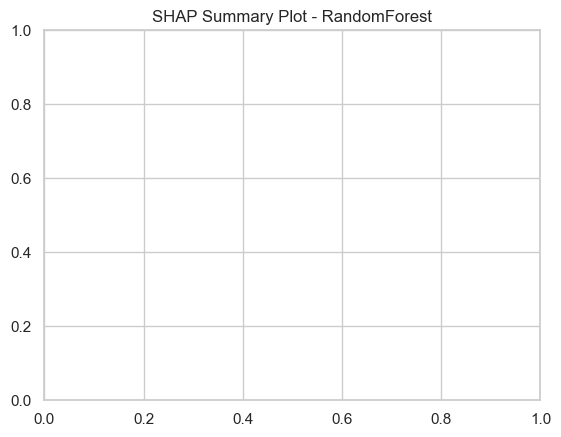



----------------------------------------
 FINAL ANALYSIS: SVM
----------------------------------------


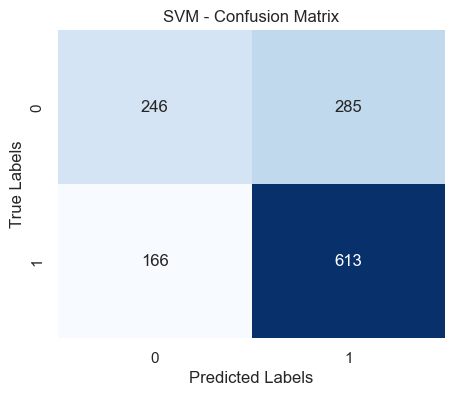

SVM AUROC: 0.6921
              precision    recall  f1-score   support

           0       0.60      0.46      0.52       531
           1       0.68      0.79      0.73       779

    accuracy                           0.66      1310
   macro avg       0.64      0.63      0.63      1310
weighted avg       0.65      0.66      0.65      1310

Skipping SHAP for SVM — KernelExplainer too slow.


----------------------------------------
 FINAL ANALYSIS: XGBoost
----------------------------------------


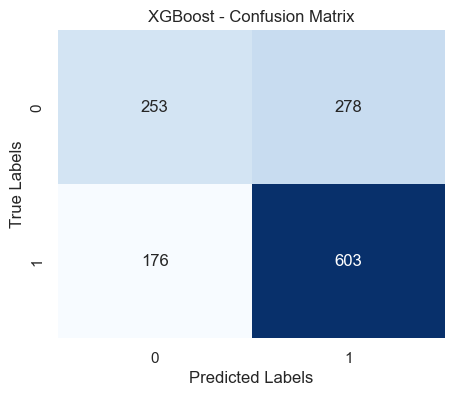

XGBoost AUROC: 0.6998
              precision    recall  f1-score   support

           0       0.59      0.48      0.53       531
           1       0.68      0.77      0.73       779

    accuracy                           0.65      1310
   macro avg       0.64      0.63      0.63      1310
weighted avg       0.65      0.65      0.65      1310



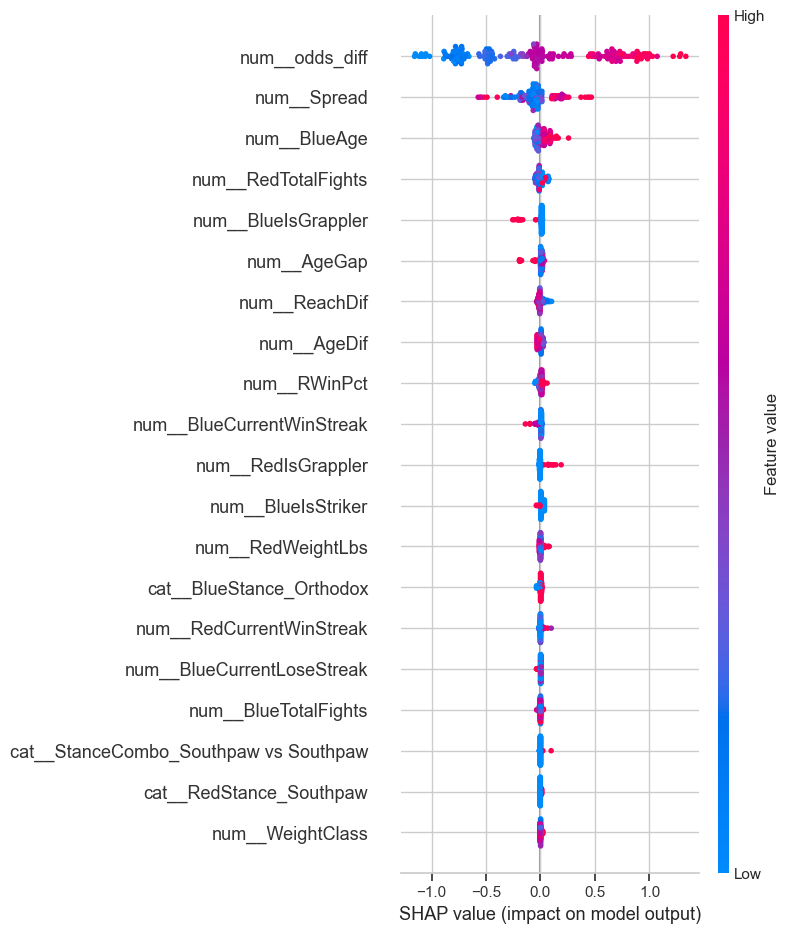

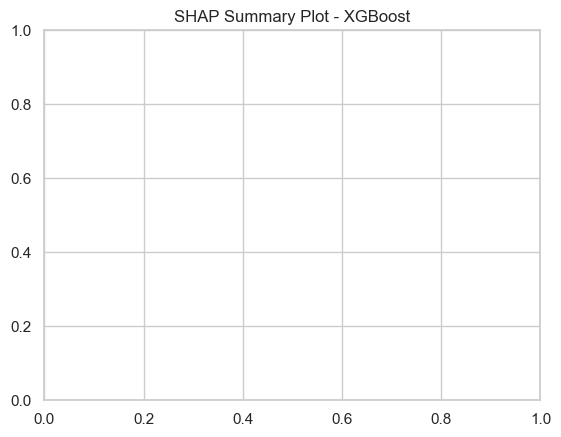

In [299]:

# --------------------------------------------------------------------
# Ensure dense inputs for SHAP/tree models - may be redundant but i'm paranoid 
# --------------------------------------------------------------------
X_train_dense = X_train_trans.toarray() if hasattr(X_train_trans, "toarray") else np.asarray(X_train_trans)
X_test_dense  = X_test_trans.toarray()  if hasattr(X_test_trans, "toarray")  else np.asarray(X_test_trans)


# --------------------------------------------------------------------
# SHAP fx 
# --------------------------------------------------------------------
def run_shap(pipeline_model, classifier, model_name, feature_names, X_sample=None):
    if X_sample is None:
        X_sample = X_test_dense[:200]  # subset for speed

    try:
        if model_name in ["RandomForest", "XGBoost"]:
            explainer = shap.TreeExplainer(classifier)
            shap_values = explainer.shap_values(X_sample)
        elif model_name == "LogisticRegression":
            masker = shap.maskers.Independent(X_sample)
            explainer = shap.KernelExplainer(classifier.predict_proba, masker)
            shap_values = explainer.shap_values(X_sample, nsamples=200)
        elif model_name == "SVM":
            print("Skipping SHAP for SVM — KernelExplainer too slow.")
            return
        else:
            print(f"SHAP not supported for {model_name}.")
            return

        shap.summary_plot(shap_values, X_sample, feature_names=feature_names, show=True)
        plt.title(f"SHAP Summary Plot - {model_name}")
        fig_name = "shap_summary_plot_{model_name}"
        fig_path = os.path.join(output_folder, f"{fig_name}.png")
        plt.savefig(fig_path, bbox_inches="tight", dpi=300)
        plt.show()
        plt.close()
    except Exception as e:
        print(f"SHAP failed for {model_name}: {e}")



# --------------------------------------------------------------------
# Ftr importance for rubric 
# --------------------------------------------------------------------
def extract_feature_importance(classifier, model_name, feature_names):
    if hasattr(classifier, "feature_importances_"):    # Tree-based
        importances = classifier.feature_importances_
    elif hasattr(classifier, "coef_"):                 # Linear models
        importances = np.abs(classifier.coef_).flatten()
    else:
        print(f"{model_name} does not support feature importances.")
        return None

    return pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances,
        "Model": model_name
    })


# --------------------------------------------------------------------
# CONFUSION MATRIX + AUROC
# --------------------------------------------------------------------
def run_confusion(pipeline_model, model_name):
    preds = pipeline_model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} - Confusion Matrix")
    fig_name = "{model_name}_confusion_matrix"
    fig_path = os.path.join(output_folder, f"{fig_name}.png")
    plt.savefig(fig_path, bbox_inches="tight", dpi=300)
    plt.show()
    plt.close()


from sklearn.preprocessing import LabelBinarizer

def run_auroc(pipeline_model, model_name):
    y_true = y_test.copy()  # 1D integer labels
    if y_true.ndim > 1:
        #y_test is one-hot, convert to single integer labels
        y_true = np.argmax(y_true, axis=1)

    try:
        if hasattr(pipeline_model, "predict_proba"):
            probs = pipeline_model.predict_proba(X_test)
            if probs.shape[1] > 2:
                # multiclass
                auc = roc_auc_score(y_true, probs, multi_class="ovr")
            else:
                auc = roc_auc_score(y_true, probs[:,1])
        else:
            probs = pipeline_model.decision_function(X_test)
            auc = roc_auc_score(y_true, probs)

        print(f"{model_name} AUROC: {auc:.4f}")
        print(classification_report(y_true, pipeline_model.predict(X_test)))
    except Exception as e:
        print(f"{model_name} AUROC failed: {e}")


# -------------------------------------------------------------------
# RUN ANALYSIS FOR ALL MODELS - home stretch 
# --------------------------------------------------------------------
all_fi = []

for model_name, info in results_summary.items():
    print(f"\n\n----------------------------------------")
    print(f" FINAL ANALYSIS: {model_name}")
    print("----------------------------------------")

    pipeline_model = info["models"][0]  # best model
    classifier = pipeline_model.named_steps["classifier"]

    # Feature names from pipeline
    try:
        feature_names = pipeline_model.named_steps["preprocessor"].get_feature_names_out()
    except:
        feature_names = X_train.columns.tolist()

    # Confusion matrix & AUROC
    run_confusion(pipeline_model, model_name)
    run_auroc(pipeline_model, model_name)

    # Feature importance
    fi_df = extract_feature_importance(classifier, model_name, feature_names)
    if fi_df is not None:
        all_fi.append(fi_df)

    # SHAP summary
    run_shap(pipeline_model, classifier, model_name, feature_names)




In [300]:
# --------------------------------------------------------------------
# XGBOOST-SPECIFIC ADVANCED ANALYSIS - BEST MODEL I KNEW IT  
# --------------------------------------------------------------------
if "XGBoost" in results_summary:
    model_name = "XGBoost"
    pipeline_model = results_summary[model_name]["models"][0]
    classifier = pipeline_model.named_steps["classifier"]
    preprocessor = pipeline_model.named_steps["preprocessor"]

    # Get feature names (post-preprocessing)
    feature_names = preprocessor.get_feature_names_out()

    print("\n========== XGBoost — Baseline vs Model ==========")

    # ---- majority baseline ----
    unique, counts = np.unique(y_train, return_counts=True)
    majority_class = unique[counts.argmax()]

    baseline_preds = np.full(len(y_test), majority_class)
    baseline_acc = accuracy_score(y_test, baseline_preds)
    baseline_f1  = f1_score(y_test, baseline_preds, average="macro")

    model_preds = pipeline_model.predict(X_test)
    model_acc = accuracy_score(y_test, model_preds)
    model_f1  = f1_score(y_test, model_preds, average="macro")

    print(f"Baseline acc: {baseline_acc:.4f}, Model acc: {model_acc:.4f}")
    print(f"Baseline F1:  {baseline_f1:.4f}, Model F1:  {model_f1:.4f}")

    # ---- PERMUTATION IMPORTANCE (must use transformed X_test) ----
    X_test_trans = preprocessor.transform(X_test)
    X_test_dense = (
        X_test_trans.toarray() if hasattr(X_test_trans, "toarray") 
        else np.asarray(X_test_trans)
    )

    perm = permutation_importance(
        classifier,
        X_test_dense,
        y_test,
        n_repeats=15,
        random_state=42,
        n_jobs=-1,
        scoring="accuracy"
    )

    perm_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": perm.importances_mean,
        "Std": perm.importances_std
    }).sort_values("Importance", ascending=False)

    print("\nTop 15 Permutation Importances:")
    print(perm_df.head(15))

    # ---- XGBoost Internal Importance - I chose: gain / cover / weight ----
    booster = classifier.get_booster()

    gain = booster.get_score(importance_type="gain")
    cover = booster.get_score(importance_type="cover")
    weight = booster.get_score(importance_type="weight")

    def map_booster_keys(score_dict):
        return {
            feature_names[int(k[1:])]: v
            for k, v in score_dict.items()
        }

    gain_map   = map_booster_keys(gain)
    cover_map  = map_booster_keys(cover)
    weight_map = map_booster_keys(weight)

    gain_df = pd.DataFrame({
        "Feature": list(gain_map.keys()),
        "Gain": list(gain_map.values()),
        "Cover": [cover_map.get(f, 0) for f in gain_map.keys()],
        "Weight": [weight_map.get(f, 0) for f in gain_map.keys()],
    }).sort_values("Gain", ascending=False)

    print("\nXGBoost Gain / Cover / Weight:")
    print(gain_df.head(20))

    # ---- SHAP Global ----
    X_shap_global = X_test_dense[:200]

    explainer = shap.TreeExplainer(classifier)


========== XGBoost — Baseline vs Model ==========
Baseline acc: 0.5947, Model acc: 0.6534
Baseline F1:  0.3729, Model F1:  0.6268

Top 15 Permutation Importances:
                                    Feature  Importance       Std
17                           num__odds_diff    0.121221  0.009547
9                             num__ReachDif    0.001730  0.001291
0                          num__WeightClass    0.001374  0.000798
8                              num__BlueAge    0.001272  0.002811
29                  cat__RedStance_Southpaw    0.000763  0.000683
16                       num__BlueIsStriker    0.000560  0.000338
12                      num__RedTotalFights    0.000458  0.000873
2                 num__BlueCurrentWinStreak    0.000356  0.001692
57      cat__StanceCombo_Switch vs Orthodox    0.000102  0.000259
1                num__BlueCurrentLoseStreak    0.000051  0.000190
55      cat__StanceCombo_Southpaw vs Switch    0.000000  0.000000
45  cat__WeightClassLabel_Women's Flyweight 